# Taller 2

Declaración Ética: Los autores Cristóbal Lobos y Javier Valladares declaran que el trabajo presentado acá es original y basado en las reglas estipuladas, y las partes del código que no son trabajo original se encuentran referenciadas.

Aporte por persona:

Javier Valladares: 

-Primer y segundo dataset de la investigación, y primer acercamiento para los gráficos de la accuracy de $\chi^2$ junto con los de Relief.
-Procesamiento de datos en el desafío.
-Procesamiento de texto en el desafío.

Cristóbal Lobos:

-Dataset sintético, y agregó múltiples semillas para que se presenten en los gráficos de la accuracy de $\chi^2$ junto con los de Relief.

-Programó el PCA, y las cross-validation mediante GridSearchCV. Además del acercamiento de $\chi^2$ para la reducción de características.

-Selección de modelos.


Fue trabajo de ambos elegir que datos utilizar para entrenar y la decisión de cual acercamiento fue el mejor para realizar la predicción utilizando los datos test.

Link video explicativo: https://drive.google.com/file/d/1vx1lrD-aCj4Nozwy3jPEGFkaM4nQ_WQv/view?usp=sharing

# Investigación

## Hipótesis

**16. Selección de Características:** Seleccionar atributos para un problema de clasificación mediante el criterio denominado $\chi^2$ resulta más efectivo que hacerlo usando RELIEF. 

###Chi 2

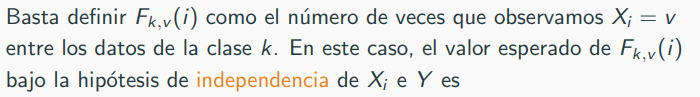

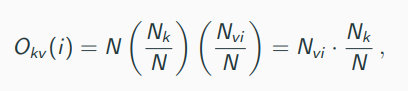

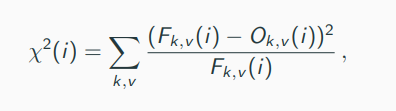

### Relief

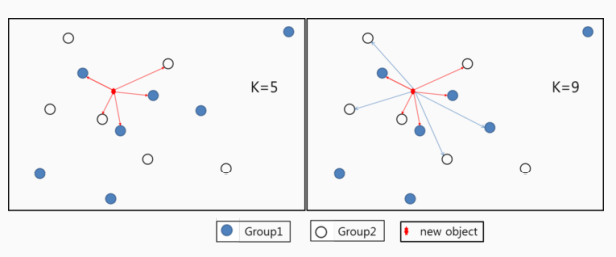

**Iterando m veces sobre la clase Xi**

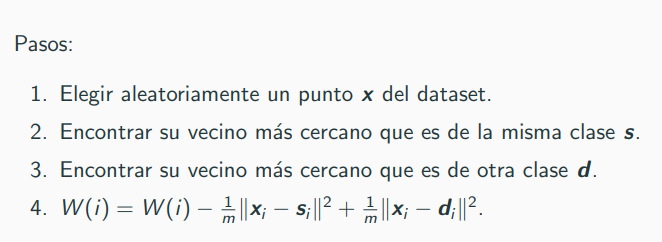

## Bibliografía

### Recent Trends in Data Science and Soft Computing Pag [151-160]

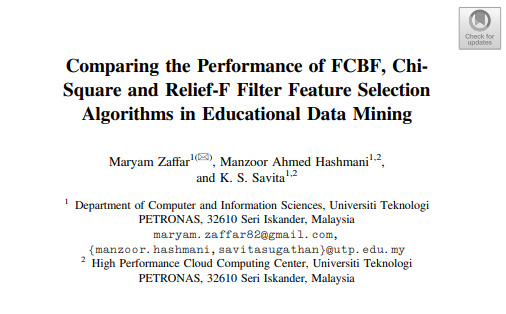

#### Resultados investigados

El primer dataset que fue testeado consistia en alumnos de secundaria en Portugal, con 33 atributos, tales como: estilo de vida, academia, ubicación, etc.

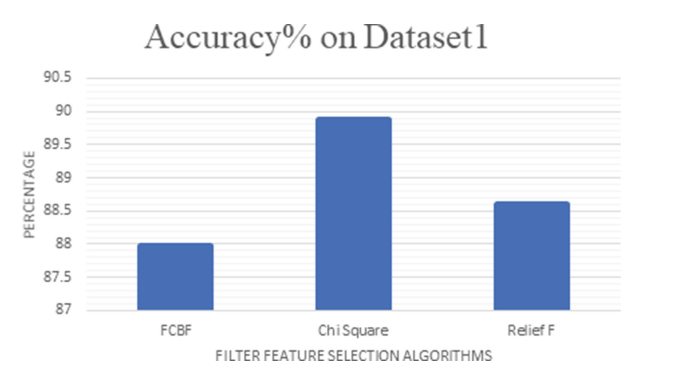

Similar al dataset 1, pero con 16 atributos solamente.

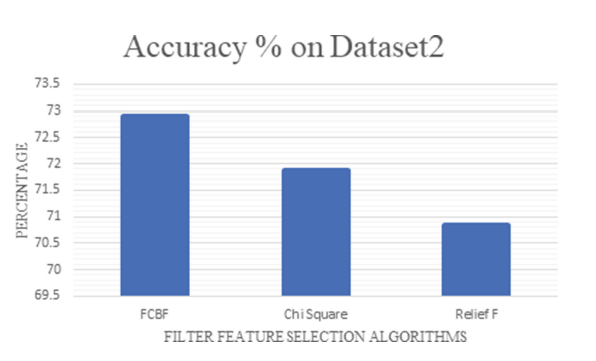

El último dataset es de estudiantes de la India, con 21 atributos a considerar.

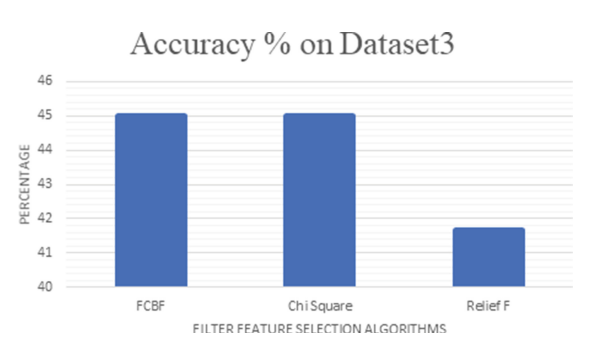

## Código 

In [ ]:
from google.colab import drive
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# hacer la conexión a Google Drive

colab_flag = True
if (colab_flag):
    from google.colab import drive
    drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dataset/'


Mounted at /content/drive


### Data 1

In [ ]:
data = pd.read_csv(path + 'diabetes.csv') #Drive

In [ ]:
#data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [ ]:
data.shape

(768, 9)

In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Revisamos los datos NaN
print("Número de datos NaN por feature: \n")
print(data.isnull().sum(axis = 0))

Número de datos NaN por feature: 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Graficos

Codigo extraido de la ayudantía número 5

In [ ]:
numeric_features = list(data.dtypes[data.dtypes != "object"].index) #Extraemos los datos númericos de nuestro dataset

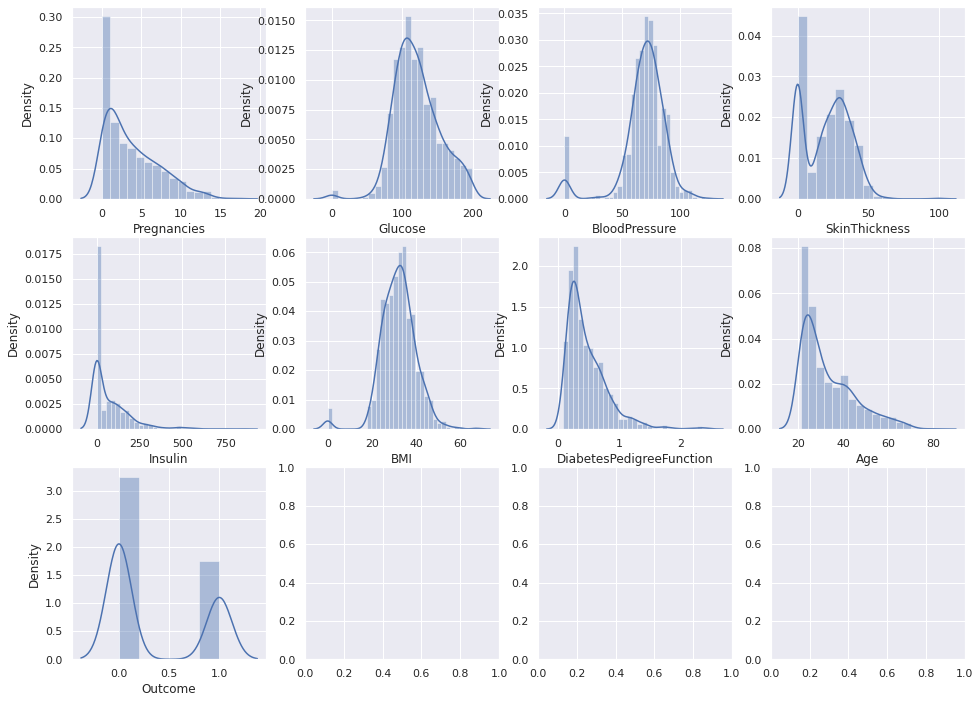

In [ ]:
n_show = min(len(numeric_features),16) #Graficamos un máximo de 16 atributos

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(numeric_features[:n_show]):
  sns.distplot(data[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  #sns.kdeplot(x=data[column], y=data['Age'],ax=axes[i//4,i%4])
  #sns.scatterplot(data=data,x=column, y='SalePrice',ax=axes[i//4,i%4])
  i = i+1
plt.show()

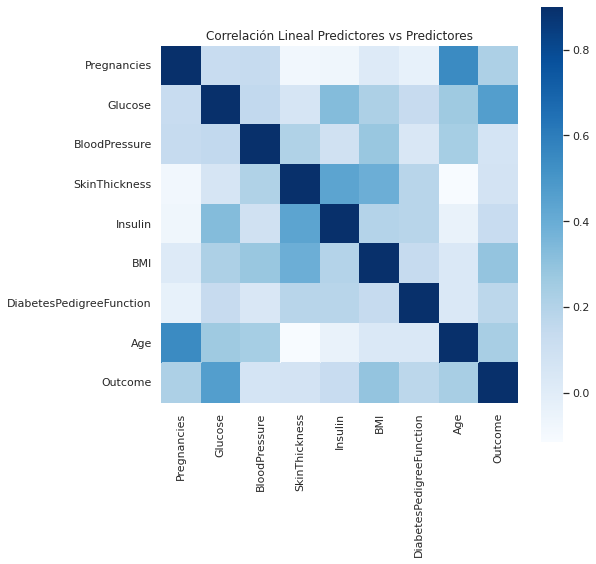

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

n_show = min(len(numeric_features),25) #Graficamos un máximo de 25 atributos

#Matriz de correlación
corrmat = data[numeric_features[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="Blues")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

####Compración

In [ ]:
!pip install sklearn_relief

In [ ]:
#Importamos las librerías necesarias

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn_relief as relief
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
X = data.drop(columns = ["Outcome","BMI","DiabetesPedigreeFunction"]).to_numpy()
y = data["Outcome"].to_numpy()
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in [100,300,400,230]:
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.6298701298701299, 0.7337662337662337, 0.7077922077922078, 0.7077922077922078], [0.6688311688311688, 0.7532467532467533, 0.7532467532467533, 0.7597402597402597], [0.6233766233766234, 0.7337662337662337, 0.7727272727272727, 0.7792207792207793], [0.6233766233766234, 0.7532467532467533, 0.7662337662337663, 0.7727272727272727]]
[[0.6558441558441559, 0.7532467532467533, 0.7077922077922078, 0.6558441558441559], [0.6558441558441559, 0.7467532467532467, 0.7597402597402597, 0.6558441558441559], [0.6753246753246753, 0.7467532467532467, 0.7207792207792207, 0.6298701298701299], [0.6298701298701299, 0.7532467532467533, 0.7467532467532467, 0.6298701298701299]]


Text(0.5, 1.0, 'SVC')

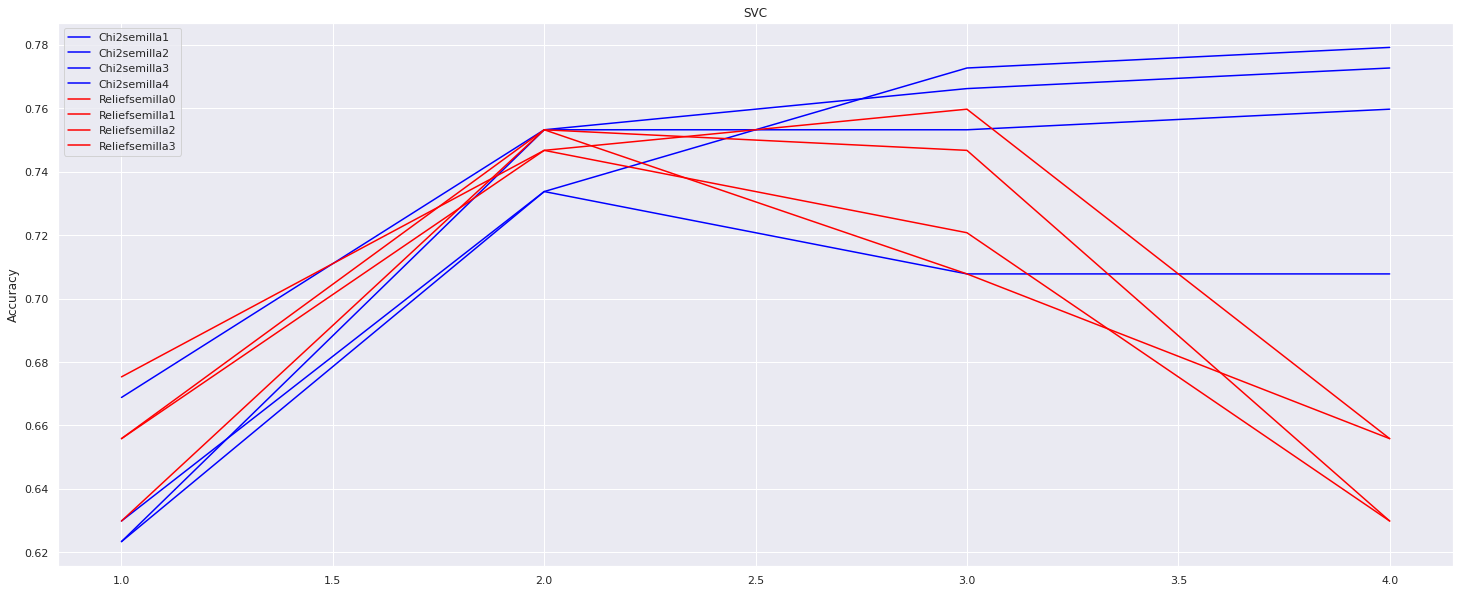

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

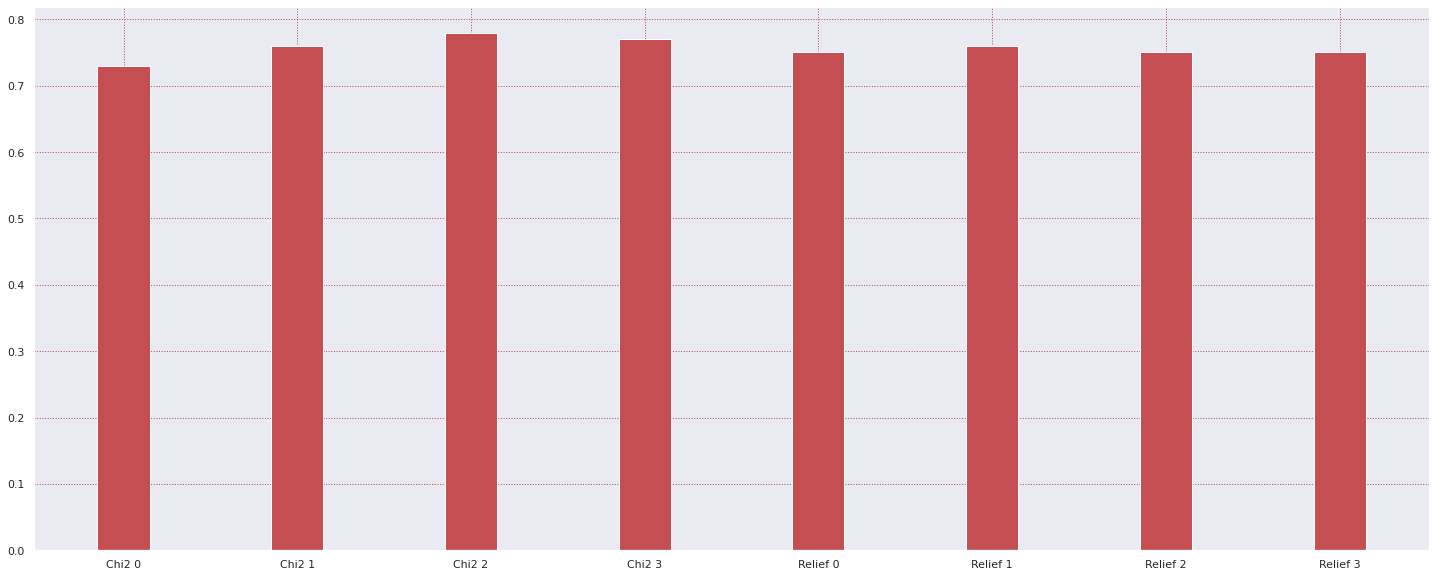

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
X = data.drop(columns = ["Outcome","BMI","DiabetesPedigreeFunction"]).to_numpy()
y = data["Outcome"].to_numpy()
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in [100,300,400,230]:
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.6493506493506493, 0.7337662337662337, 0.7597402597402597, 0.7662337662337663], [0.6493506493506493, 0.7337662337662337, 0.7597402597402597, 0.7662337662337663], [0.6493506493506493, 0.7337662337662337, 0.7597402597402597, 0.7662337662337663], [0.6493506493506493, 0.7337662337662337, 0.7597402597402597, 0.7662337662337663]]
[[0.6428571428571429, 0.7467532467532467, 0.7662337662337663, 0.37012987012987014], [0.6428571428571429, 0.7467532467532467, 0.6428571428571429, 0.45454545454545453], [0.6428571428571429, 0.7467532467532467, 0.6428571428571429, 0.37012987012987014], [0.6428571428571429, 0.7467532467532467, 0.7662337662337663, 0.37012987012987014]]


Text(0.5, 1.0, 'Logistic Regression')

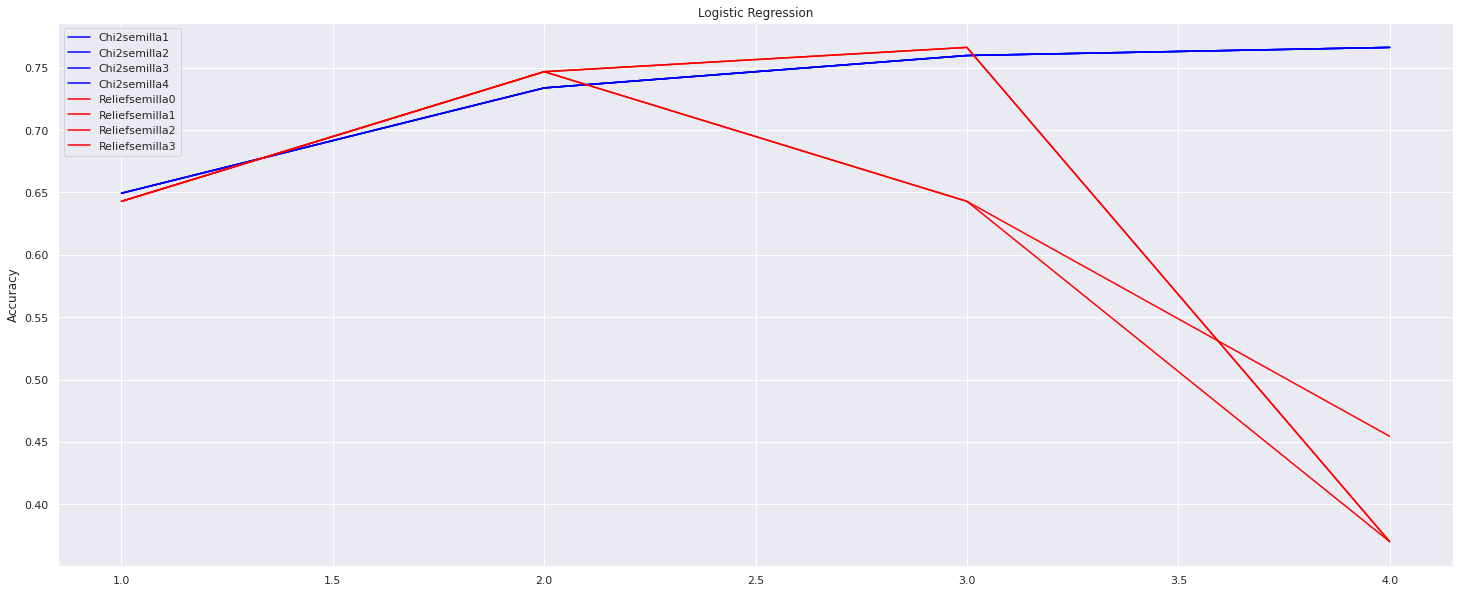

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

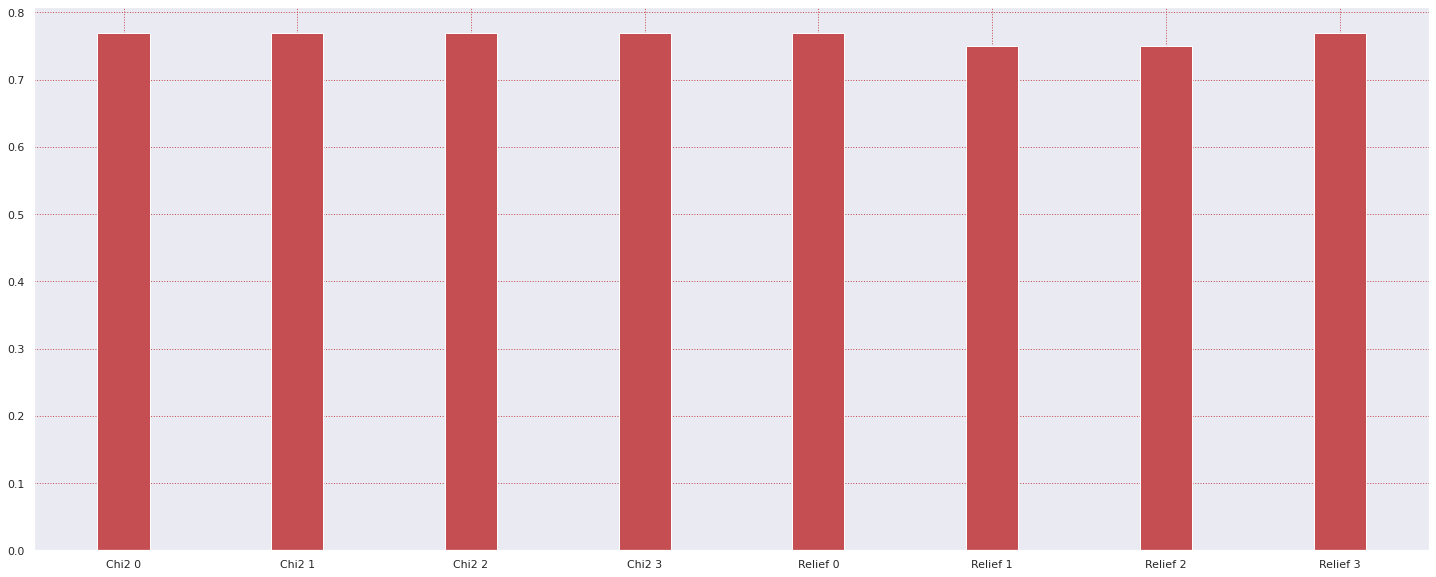

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data 2

In [ ]:
#data = pd.read_csv(path + 'heart.csv') #Drive

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#Revisamos los datos NaN
print("Número de datos NaN por feature: \n")
print(data.isnull().sum(axis = 0))

Número de datos NaN por feature: 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#### Cambiar datos no numericos

In [ ]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
def pain_(texto):

  if texto == 'ATA':
    return 0
  if texto == 'NAP':
    return 1
  if texto == 'ASY':
    return 2
  else:
    return 3


In [ ]:
data['ChestPainType'] = data.apply(lambda x: pain_(x['ChestPainType']),axis=1)

In [ ]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
def res_(texto):

  if texto == 'Normal':
    return 0
  if texto == 'ST':
    return 1
  else:
    return 2

In [ ]:
data['RestingECG'] = data.apply(lambda x: res_(x['RestingECG']),axis=1)

In [ ]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
def ang_(texto):

  if texto == 'N':
    return 0
  else:
    return 1


In [ ]:
data['ExerciseAngina'] = data.apply(lambda x: ang_(x['ExerciseAngina']),axis=1)

In [ ]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
def sex_(texto):

  if texto == 'M':
    return 0
  else:
    return 1

In [ ]:
data['Sex'] = data.apply(lambda x: sex_(x['Sex']),axis=1)

In [ ]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
def st_(texto):

  if texto == 'Up':
    return 0
  if texto == 'Flat':
    return 1
  else:
    return 2


In [ ]:
data['ST_Slope'] = data.apply(lambda x: st_(x['ST_Slope']),axis=1)

#### Graficos

In [ ]:
numeric_features = list(data.dtypes[data.dtypes != "object"].index)

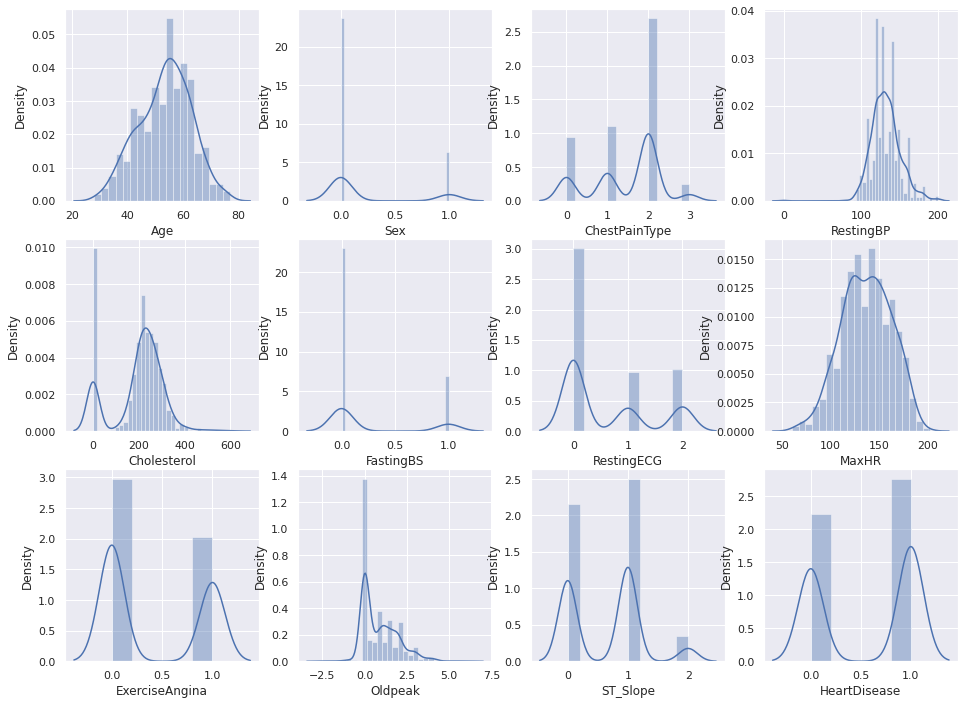

In [ ]:
n_show = min(len(numeric_features),16) #Graficamos hasta 16 atributos

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(numeric_features[:n_show]):
  sns.distplot(data[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  #sns.kdeplot(x=data[column], y=data['Age'],ax=axes[i//4,i%4])
  #sns.scatterplot(data=data,x=column, y='SalePrice',ax=axes[i//4,i%4])
  i = i+1
plt.show()

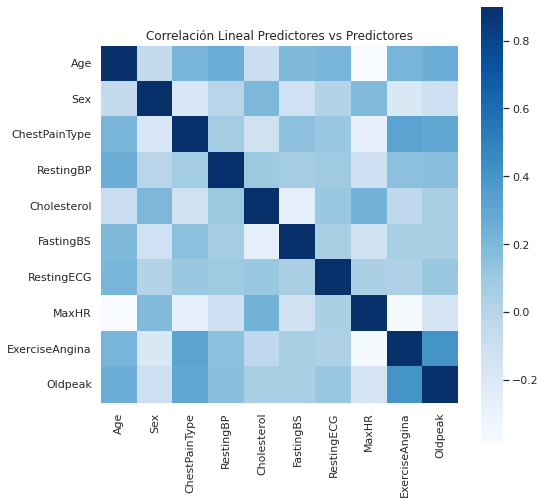

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

n_show = min(len(numeric_features),10) #Graficamos máximo 10 atributos

#Matriz de correlación
corrmat = data[numeric_features[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="Blues")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

#### Comparación

##### SVC

In [ ]:
X = data.drop(columns = ["HeartDisease","Oldpeak"])
y = data["HeartDisease"]

In [ ]:
#Definimos los atributos y el target
X = data.drop(columns = ["HeartDisease","Oldpeak"]).to_numpy()
y = data["HeartDisease"].to_numpy()

#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

for j in [100,300,400,230]:
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.6413043478260869, 0.7065217391304348, 0.8097826086956522, 0.8043478260869565, 0.8260869565217391, 0.8369565217391305, 0.8695652173913043, 0.8586956521739131], [0.6358695652173914, 0.717391304347826, 0.8478260869565217, 0.8369565217391305, 0.8532608695652174, 0.8641304347826086, 0.8586956521739131, 0.8695652173913043], [0.6304347826086957, 0.6630434782608695, 0.7989130434782609, 0.7934782608695652, 0.782608695652174, 0.8097826086956522, 0.7934782608695652, 0.8097826086956522], [0.5760869565217391, 0.7228260869565217, 0.875, 0.842391304347826, 0.8641304347826086, 0.8641304347826086, 0.8967391304347826, 0.8913043478260869]]
[[0.4891304347826087, 0.5380434782608695, 0.5706521739130435, 0.5706521739130435, 0.5706521739130435, 0.5706521739130435, 0.5706521739130435, 0.5706521739130435], [0.5543478260869565, 0.483695652173913, 0.33152173913043476, 0.44021739130434784, 0.44021739130434784, 0.44021739130434784, 0.44021739130434784, 0.44021739130434784], [0.4673913043478261, 0.55978260869565

Text(0.5, 1.0, 'SVC')

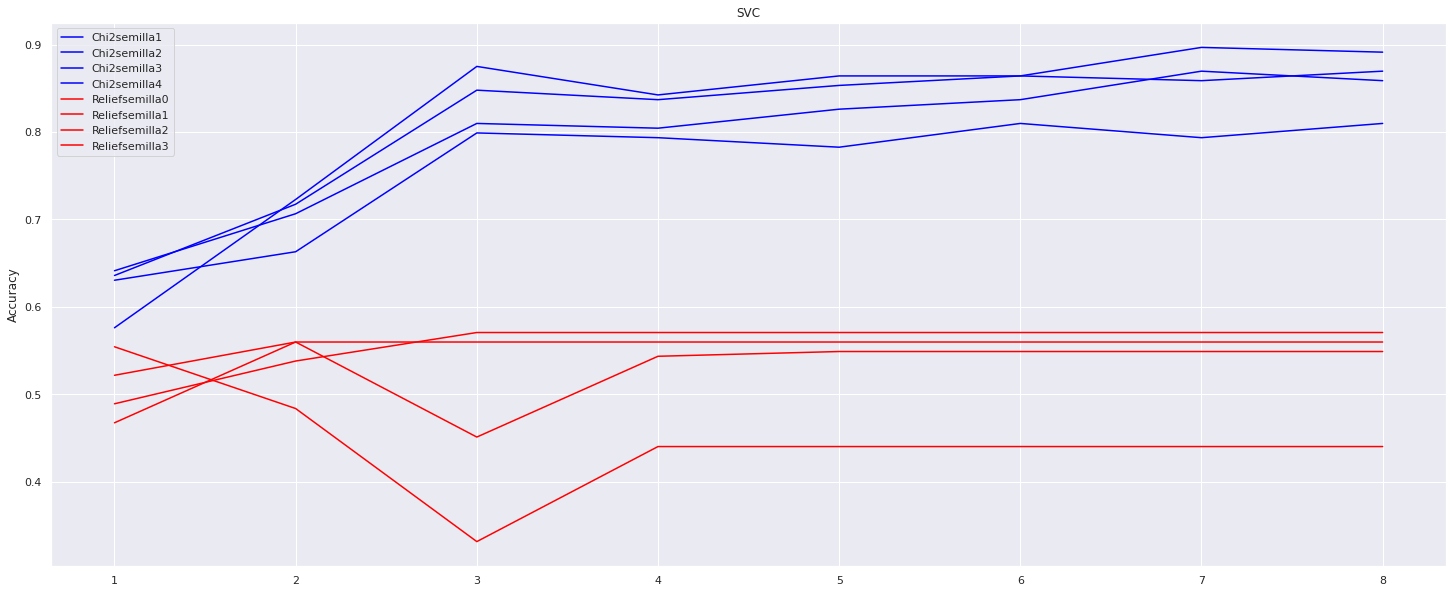

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

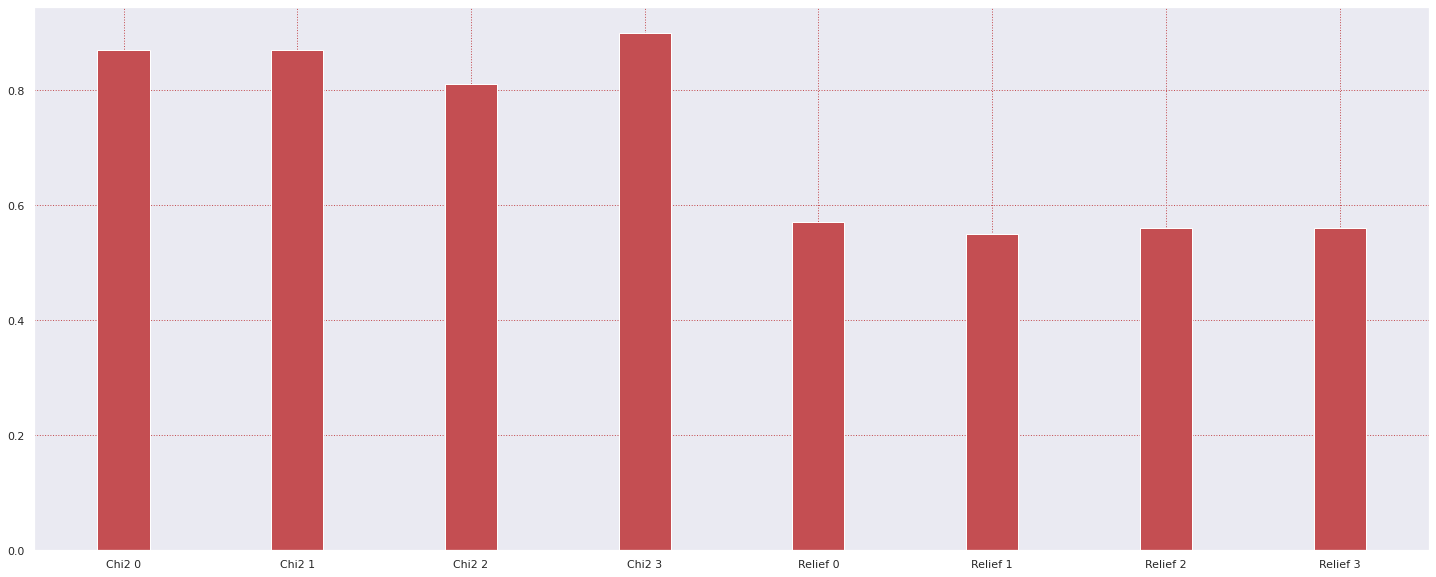

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

##### Logistic regression

In [ ]:
#Definimos los atributos y el target
X = data.drop(columns = ["HeartDisease","Oldpeak"]).to_numpy()
y = data["HeartDisease"].to_numpy()

#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in [100,300,400,230]:
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.46195652173913043, 0.657608695652174, 0.7934782608695652, 0.7608695652173914, 0.75, 0.8043478260869565, 0.8206521739130435, 0.8206521739130435], [0.46195652173913043, 0.657608695652174, 0.7934782608695652, 0.7608695652173914, 0.75, 0.8043478260869565, 0.8206521739130435, 0.8206521739130435], [0.46195652173913043, 0.657608695652174, 0.7934782608695652, 0.7608695652173914, 0.75, 0.8043478260869565, 0.8206521739130435, 0.8206521739130435], [0.46195652173913043, 0.657608695652174, 0.7934782608695652, 0.7608695652173914, 0.75, 0.8043478260869565, 0.8206521739130435, 0.8206521739130435]]
[[0.5815217391304348, 0.5815217391304348, 0.45108695652173914, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5652173913043478, 0.5652173913043478], [0.5815217391304348, 0.5597826086956522, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5815217391304348, 0.5652173913043478, 0.5760869565217391], [0.5815217391304348, 0.5815217391304348, 0.45108695652173914, 0.5815217391304348,

Text(0.5, 1.0, 'Logistic Regression')

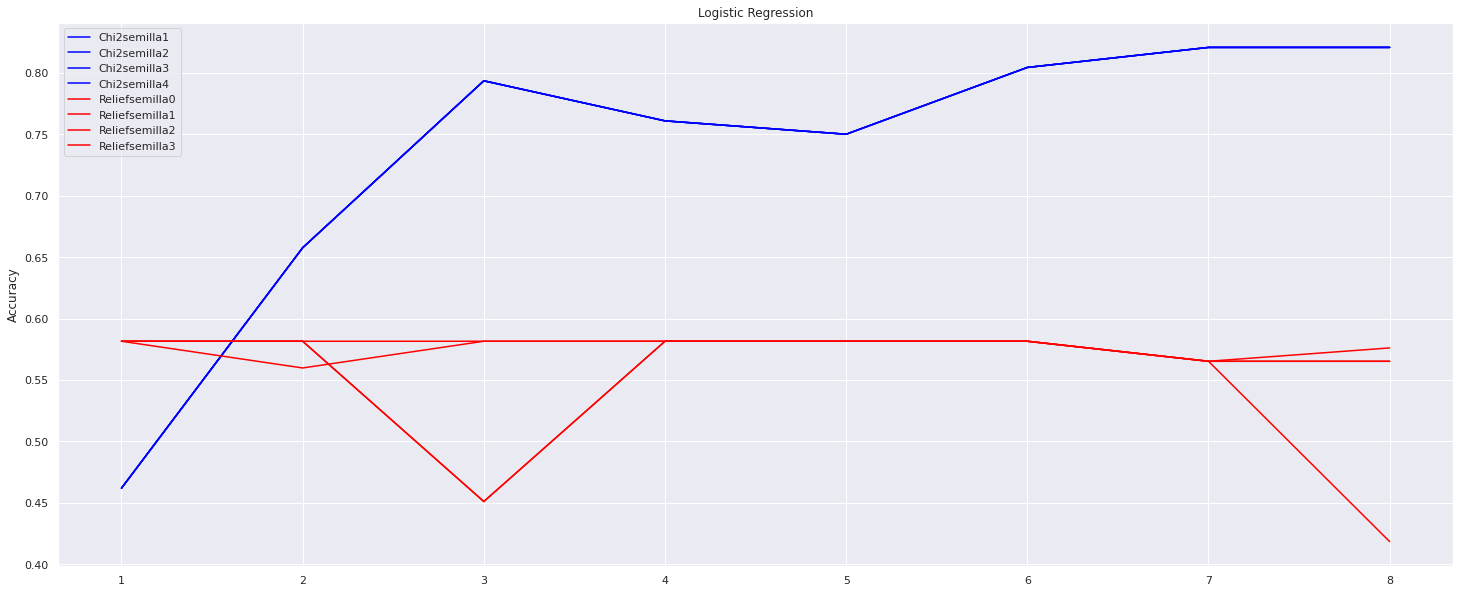

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

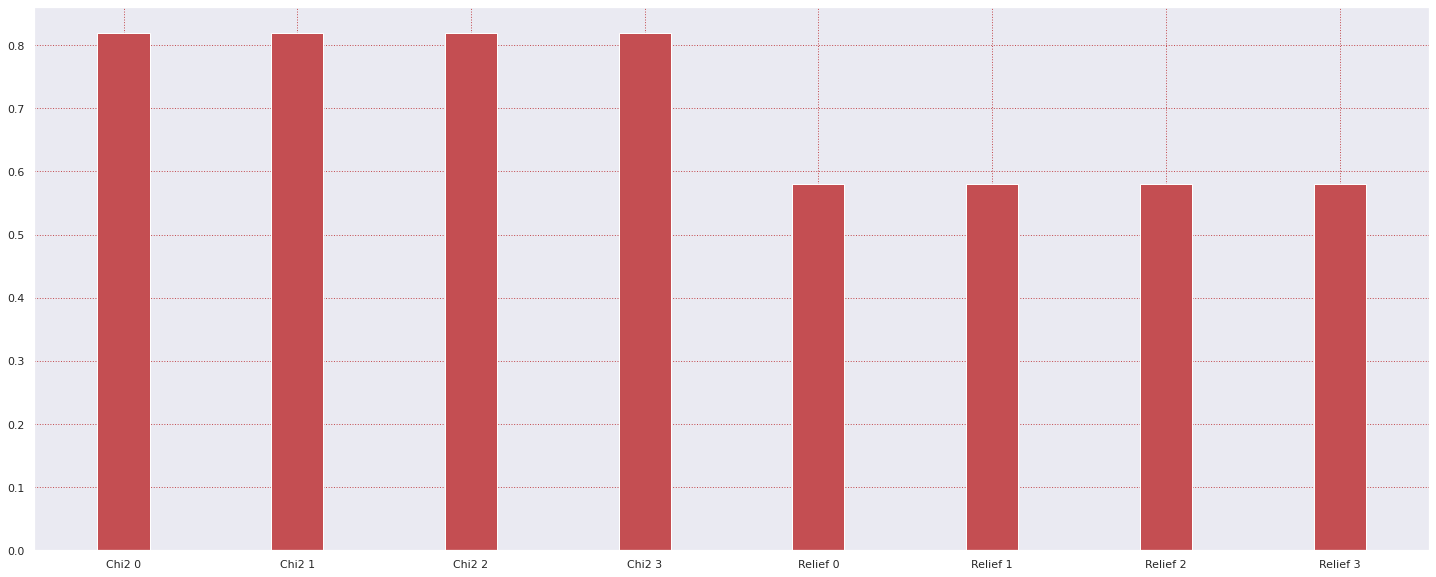

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 100 Características - Sin datos repetidos ni redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:


#Creacion de datos sinteticos para clasificacion, son 1000 ejemplos, con 20 features, no se repite ninguno y no hay redundancia
#Corresponde a una clasificación binaria por default

X,y = make_classification(n_samples = 1000, n_features = 100 ,n_repeated=0, n_redundant=0, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 10)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.85, 0.855, 0.86, 0.855, 0.855, 0.855, 0.865, 0.855, 0.865, 0.855, 0.835, 0.845, 0.845, 0.85, 0.85, 0.845, 0.83, 0.835, 0.83, 0.83, 0.825, 0.835, 0.84, 0.845, 0.85, 0.855, 0.845, 0.835, 0.85, 0.845, 0.84, 0.85, 0.85, 0.85, 0.855, 0.855, 0.85, 0.85, 0.84, 0.845, 0.845, 0.835, 0.835, 0.835, 0.84, 0.84, 0.835, 0.835, 0.84, 0.835, 0.835, 0.835, 0.835, 0.85, 0.85, 0.85, 0.845, 0.845, 0.85, 0.845, 0.855, 0.85, 0.84, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.845, 0.84, 0.845, 0.85, 0.85, 0.845, 0.845, 0.845, 0.84, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.84, 0.84, 0.84, 0.84, 0.835, 0.835, 0.835, 0.825, 0.82, 0.825, 0.82, 0.825, 0.83, 0.83], [0.845, 0.845, 0.835, 0.84, 0.84, 0.84, 0.855, 0.845, 0.83, 0.81, 0.81, 0.8, 0.82, 0.83, 0.835, 0.835, 0.83, 0.815, 0.82, 0.83, 0.835, 0.82, 0.815, 0.835, 0.83, 0.835, 0.825, 0.84, 0.84, 0.84, 0.84, 0.84, 0.835, 0.84, 0.845, 0.845, 0.845, 0.825, 0.835, 0.84, 0.845, 0.845, 0.84, 0.845, 0.84, 0.84, 0.84, 0.84, 0.82, 0.815, 0.825, 0.83, 0.825, 0.825, 0.83,

Text(0.5, 1.0, 'SVC')

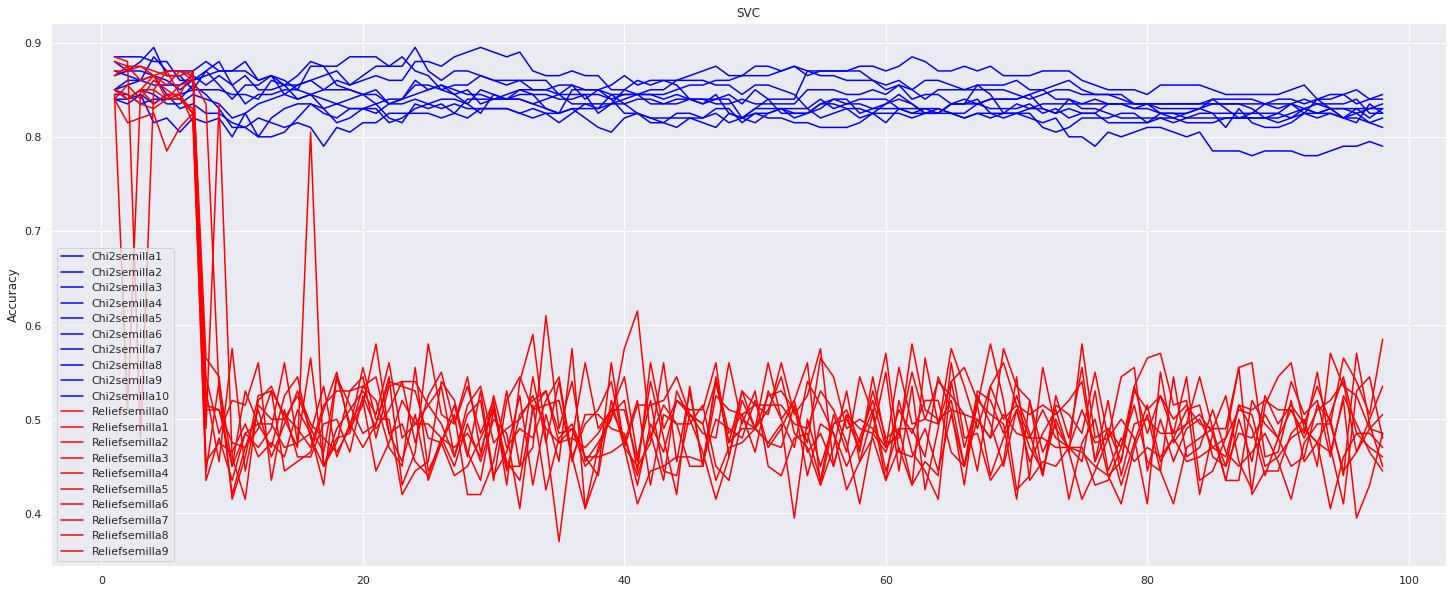

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.905, 0.895, 0.895, 0.895, 0.9, 0.9, 0.9, 0.9, 0.895, 0.885, 0.89, 0.89, 0.88, 0.875, 0.88, 0.89, 0.875, 0.865, 0.865, 0.865, 0.865, 0.855, 0.875, 0.88, 0.88, 0.865, 0.86, 0.875, 0.87, 0.87, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.875, 0.88, 0.885, 0.885, 0.885, 0.885, 0.88, 0.885, 0.885, 0.885, 0.88, 0.88, 0.88, 0.88, 0.89, 0.875, 0.875, 0.87, 0.87, 0.87, 0.87, 0.88, 0.855, 0.855, 0.855, 0.86, 0.86, 0.86, 0.86, 0.865, 0.86, 0.865, 0.855, 0.855, 0.865, 0.86, 0.85, 0.855, 0.845, 0.845, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.84, 0.84, 0.84, 0.83, 0.83, 0.83, 0.84, 0.835, 0.835, 0.835, 0.835, 0.835, 0.83], [0.905, 0.895, 0.895, 0.895, 0.9, 0.9, 0.9, 0.9, 0.895, 0.885, 0.89, 0.89, 0.88, 0.875, 0.88, 0.89, 0.875, 0.865, 0.865, 0.865, 0.865, 0.855, 0.875, 0.88, 0.88, 0.865, 0.86, 0.875, 0.87, 0.87, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.875, 0.88, 0.885, 0.885, 0.885, 0.885, 0.88, 0.885, 0.885, 0.885, 0.88, 0.88, 0.88, 0.88, 0.89, 0.875, 0.875, 0.87, 

Text(0.5, 1.0, 'Logistic Regression')

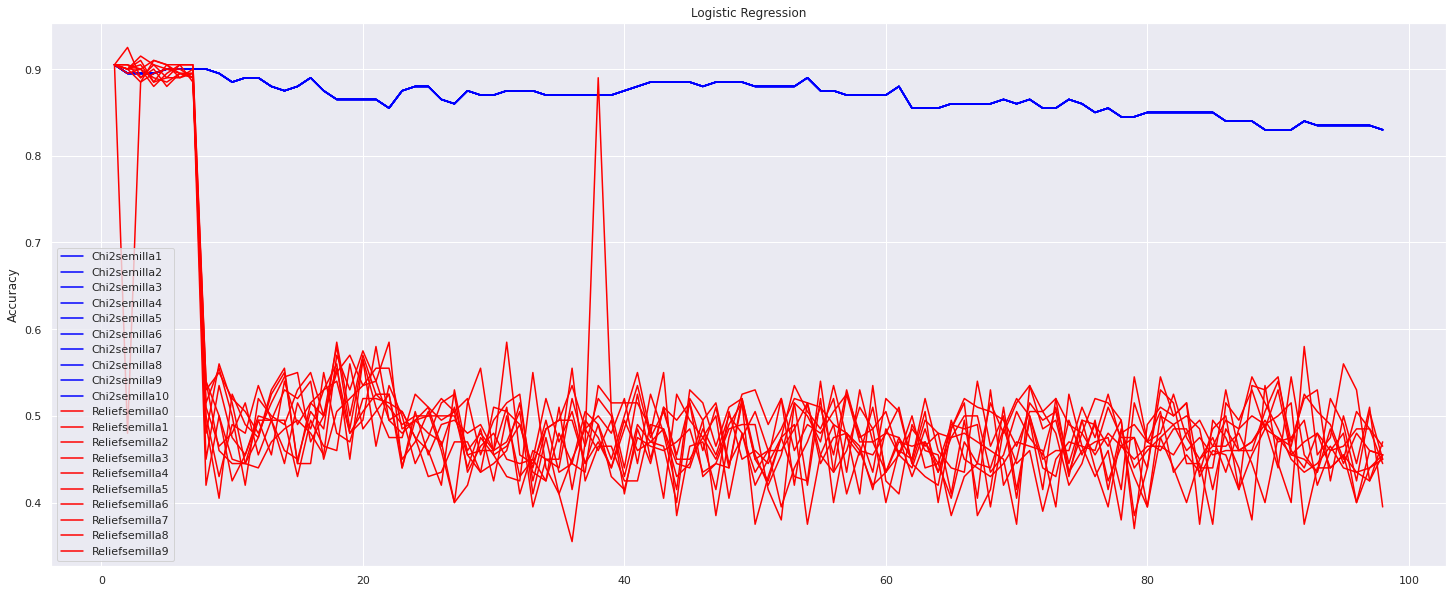

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

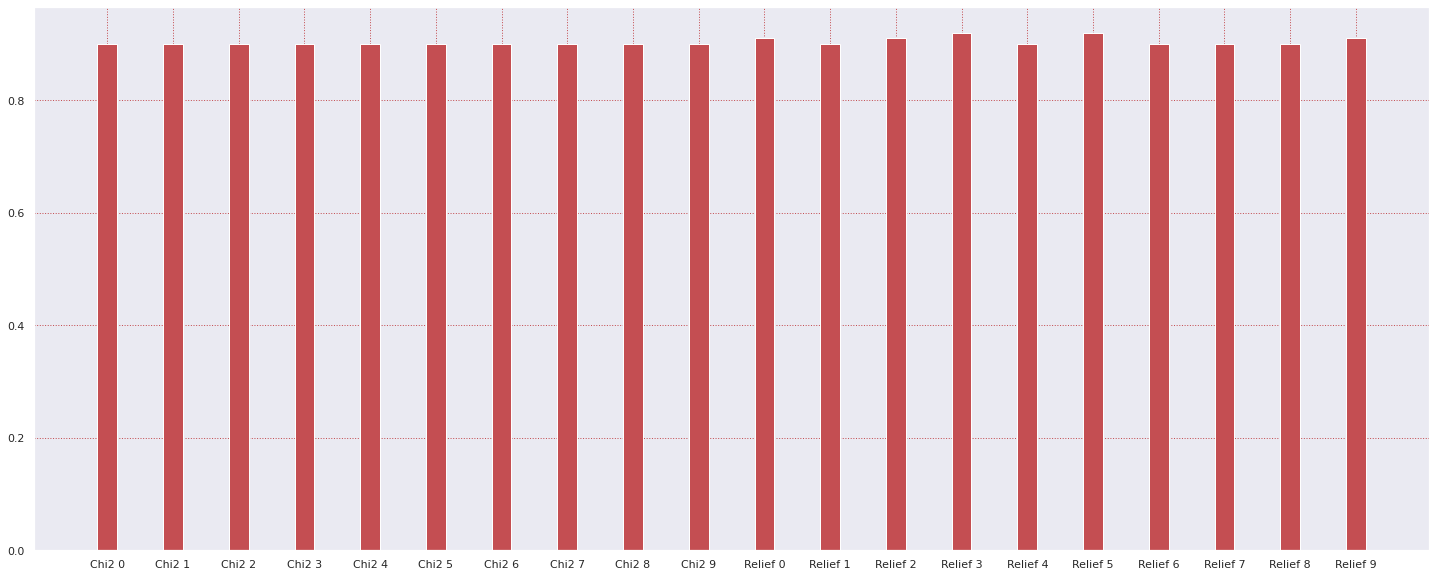

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 100 Características - Con 10 caracteristicas repetidas y 10 redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:


#Creacion de datos sinteticos para clasificacion, son 1000 ejemplos, con 20 features, no se repite ninguno y no hay redundancia
#Corresponde a una clasificación binaria por default

X,y = make_classification(n_samples = 1000, n_features = 100 ,n_repeated=10, n_redundant=10, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 10)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.86, 0.865, 0.865, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.885, 0.87, 0.87, 0.875, 0.875, 0.875, 0.88, 0.885, 0.865, 0.87, 0.88, 0.865, 0.86, 0.86, 0.855, 0.855, 0.855, 0.845, 0.87, 0.865, 0.87, 0.875, 0.87, 0.87, 0.875, 0.88, 0.875, 0.87, 0.86, 0.865, 0.865, 0.855, 0.86, 0.87, 0.865, 0.865, 0.865, 0.87, 0.87, 0.865, 0.86, 0.87, 0.865, 0.87, 0.865, 0.87, 0.87, 0.87, 0.87, 0.865, 0.875, 0.87, 0.87, 0.855, 0.855, 0.86, 0.855, 0.855, 0.845, 0.855, 0.855, 0.86, 0.855, 0.86, 0.865, 0.86, 0.86, 0.86, 0.86, 0.855, 0.855, 0.85, 0.855, 0.86, 0.86, 0.865, 0.875, 0.87], [0.845, 0.865, 0.865, 0.87, 0.87, 0.865, 0.865, 0.865, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.88, 0.88, 0.88, 0.885, 0.875, 0.89, 0.895, 0.895, 0.89, 0.88, 0.88, 0.875, 0.875, 0.88, 0.87, 0.87, 0.86, 0.85, 0.845, 0.845, 0.845, 0.845, 0.85, 0.85, 0.855, 0.85, 0.85, 0.85, 0.855, 0.85, 0.86, 0.86, 0.865, 0.86, 0.865, 0.855, 0.865, 0.855

Text(0.5, 1.0, 'SVC')

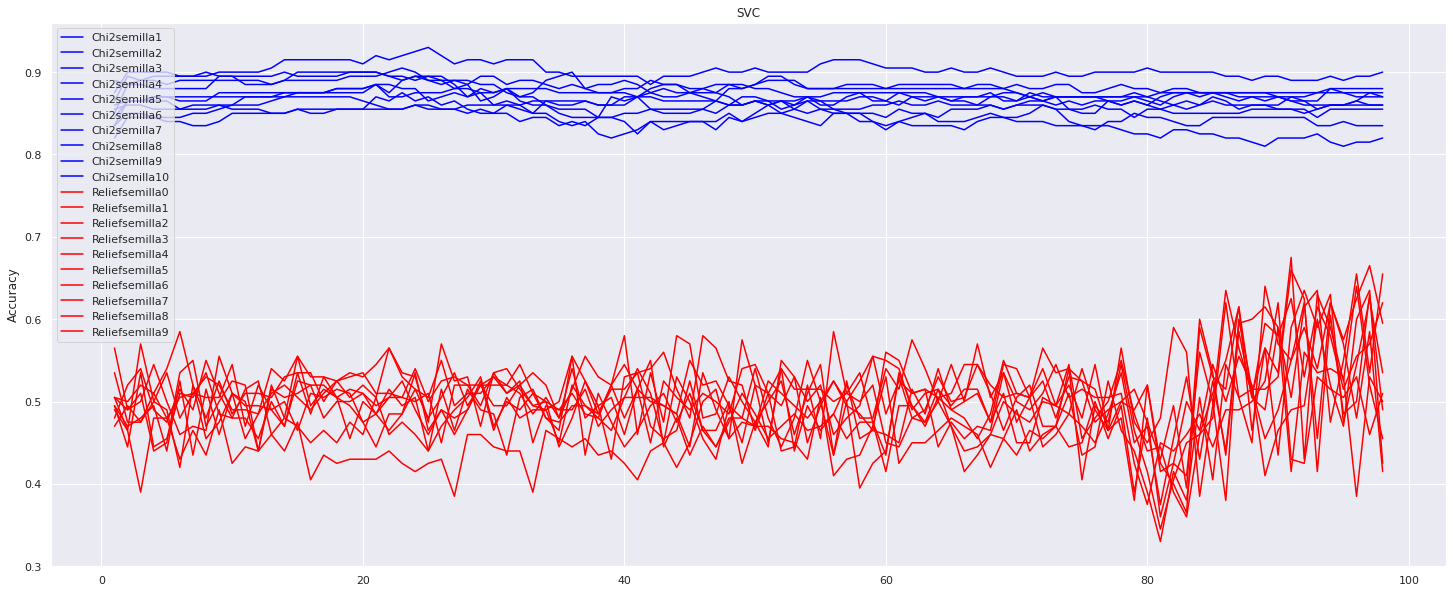

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.815, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.825, 0.825, 0.83, 0.84, 0.845, 0.85, 0.845, 0.84, 0.84, 0.845, 0.85, 0.845, 0.855, 0.845, 0.84, 0.84, 0.84, 0.84, 0.84, 0.845, 0.84, 0.84, 0.845, 0.845, 0.835, 0.835, 0.845, 0.845, 0.84, 0.84, 0.83, 0.835, 0.835, 0.835, 0.835, 0.835, 0.825, 0.825, 0.82, 0.825, 0.825, 0.83, 0.83, 0.83, 0.83, 0.82, 0.805, 0.815, 0.81, 0.81, 0.81, 0.81, 0.805, 0.795, 0.795, 0.79, 0.79, 0.79, 0.79, 0.79, 0.795, 0.79, 0.795, 0.795, 0.795, 0.79, 0.785, 0.79, 0.79, 0.79, 0.79, 0.785, 0.785, 0.785, 0.78, 0.78, 0.78, 0.78], [0.815, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.825, 0.825, 0.83, 0.84, 0.845, 0.85, 0.845, 0.84, 0.84, 0.845, 0.85, 0.845, 0.855, 0.845, 0.84, 0.84, 0.84, 0.84, 0.84, 0.845, 0.84, 0.84, 0.845, 0.845, 0.835, 0.835, 0.845, 0.845, 0.84, 0.84, 0.83, 0.835, 0.8

Text(0.5, 1.0, 'Logistic Regression')

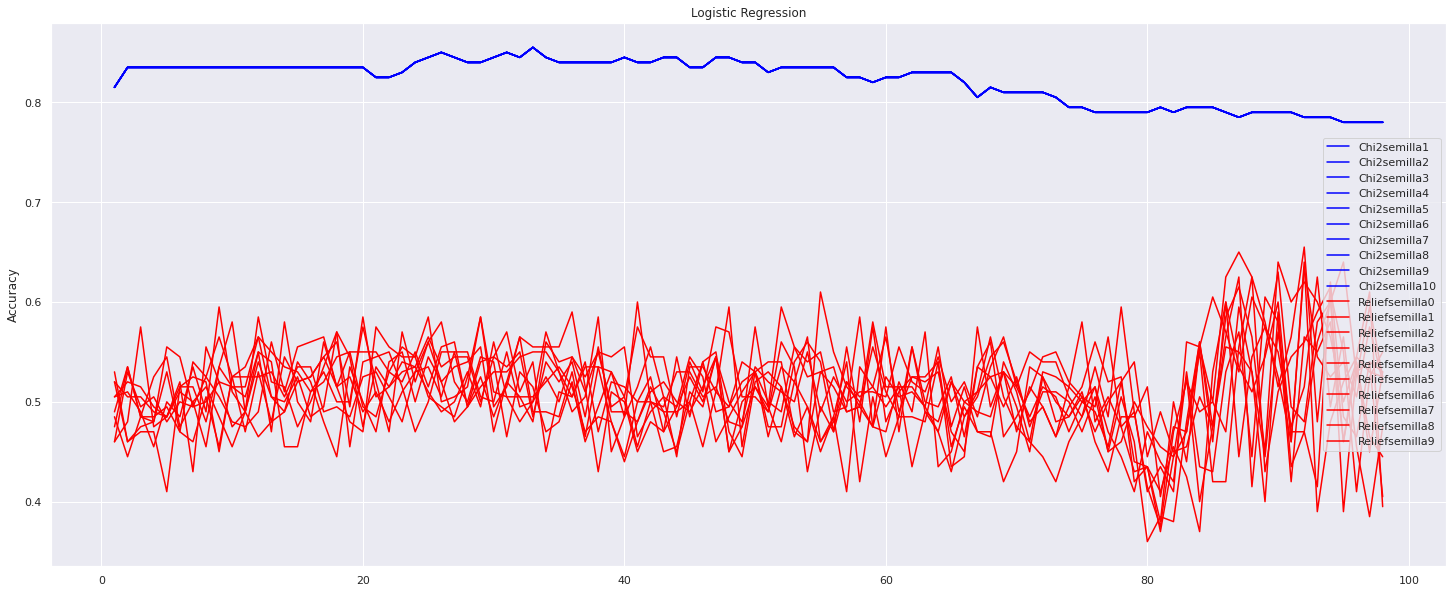

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

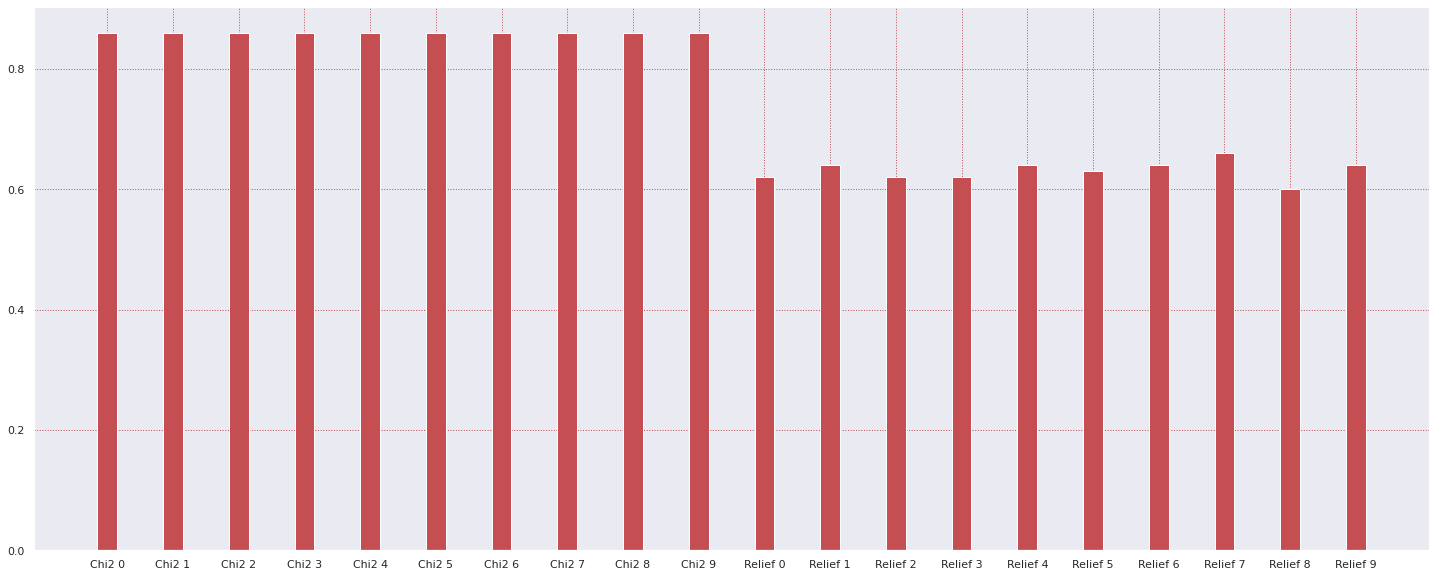

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 100 Características - Con 50 caracteristicas repetidas y 30 redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:
X,y = make_classification(n_samples = 1000, n_features = 100 ,n_repeated=50, n_redundant=30, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 10)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.865, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.875, 0.88, 0.875, 0.875, 0.875, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.865, 0.865, 0.865, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.875, 0.87, 0.875, 0.875, 0.87, 0.88, 0.875, 0.88, 0.88, 0.87, 0.865, 0.87, 0.88, 0.88, 0.88, 0.87, 0.88, 0.88, 0.87, 0.87, 0.87, 0.87], [0.895, 0.895, 0.895, 0.895, 0.895, 0.895, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.89, 0.89, 0.89, 0.89, 0.89, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.89, 0.89, 0.89, 0.89, 0.89, 0.885, 0.885, 0.885, 0.89, 0.885, 0.885, 0.885, 0.885, 0.885, 0.885, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.895, 0.895, 0.9, 0.895, 0.895, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.8

Text(0.5, 1.0, 'SVC')

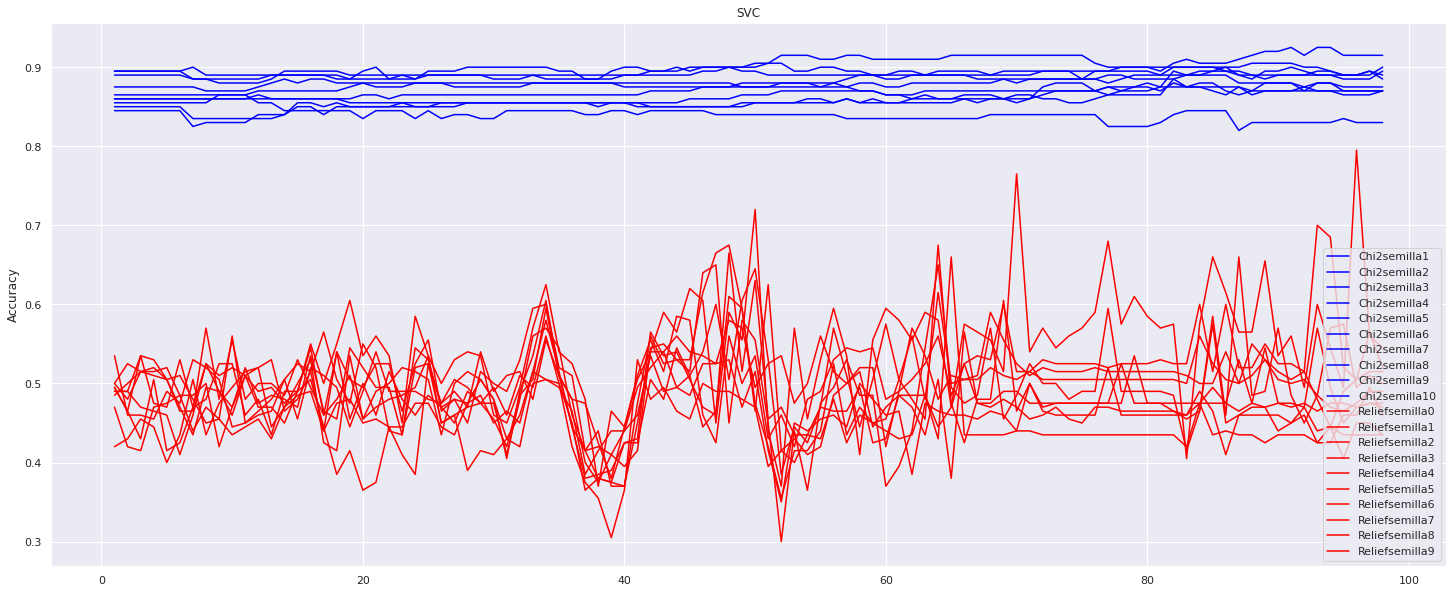

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.835, 0.845, 0.845, 0.845, 0.845, 0.845, 0.845, 0.845, 0.85, 0.845, 0.835, 0.84, 0.83, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.84], [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83,

Text(0.5, 1.0, 'Logistic Regression')

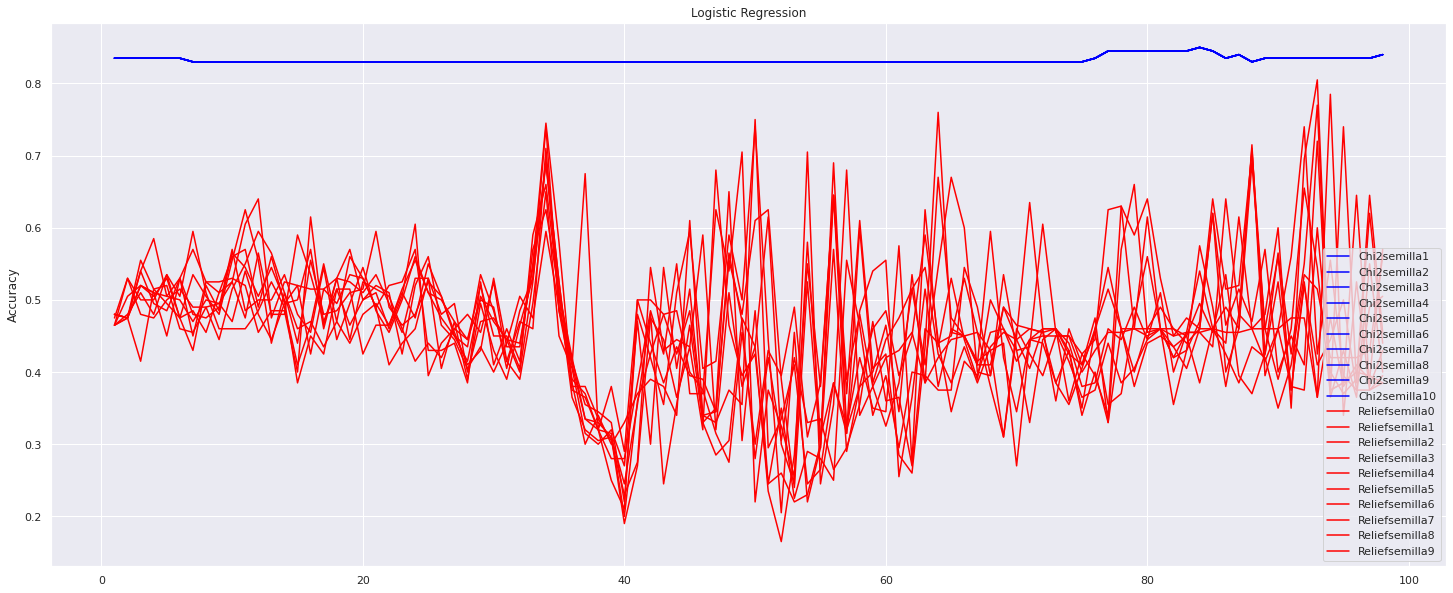

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

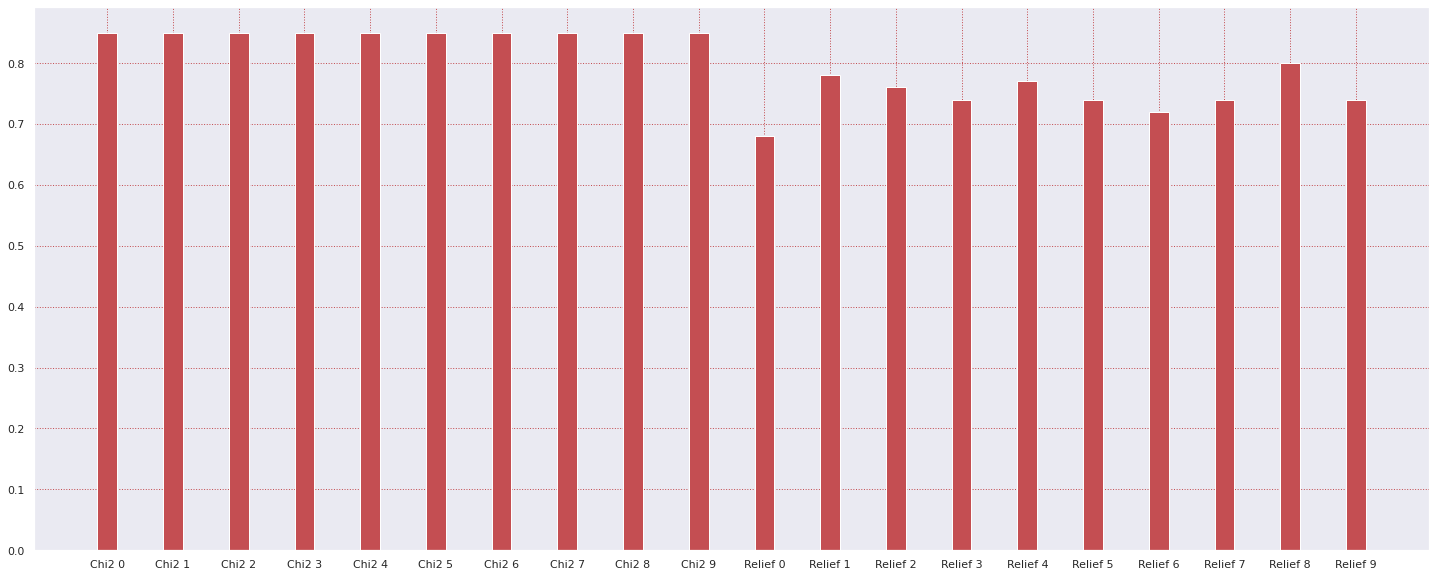

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 10 Características - Sin caracteristicas repetidas ni redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:


#Creacion de datos sinteticos para clasificacion, son 1000 ejemplos, con 20 features, no se repite ninguno y no hay redundancia
#Corresponde a una clasificación binaria por default

X,y = make_classification(n_samples = 1000, n_features = 10 ,n_repeated=0, n_redundant=0, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 200)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.895, 0.9, 0.905, 0.915, 0.93, 0.915, 0.885, 0.895], [0.88, 0.885, 0.885, 0.885, 0.895, 0.895, 0.895, 0.9], [0.84, 0.84, 0.84, 0.84, 0.835, 0.845, 0.835, 0.835], [0.875, 0.865, 0.875, 0.875, 0.865, 0.875, 0.875, 0.89], [0.885, 0.88, 0.89, 0.885, 0.885, 0.885, 0.885, 0.88], [0.875, 0.86, 0.855, 0.85, 0.87, 0.87, 0.865, 0.88], [0.88, 0.87, 0.86, 0.865, 0.875, 0.875, 0.875, 0.87], [0.88, 0.86, 0.85, 0.86, 0.87, 0.855, 0.855, 0.86], [0.9, 0.9, 0.895, 0.89, 0.89, 0.885, 0.9, 0.905], [0.9, 0.895, 0.9, 0.9, 0.895, 0.905, 0.905, 0.875]]
[[0.895, 0.91, 0.9, 0.895, 0.905, 0.88, 0.89, 0.89], [0.88, 0.895, 0.88, 0.885, 0.875, 0.89, 0.875, 0.865], [0.84, 0.845, 0.845, 0.815, 0.83, 0.835, 0.845, 0.815], [0.875, 0.875, 0.87, 0.865, 0.87, 0.875, 0.88, 0.85], [0.885, 0.89, 0.885, 0.9, 0.885, 0.875, 0.9, 0.87], [0.875, 0.88, 0.875, 0.87, 0.88, 0.875, 0.875, 0.875], [0.88, 0.88, 0.885, 0.87, 0.86, 0.84, 0.86, 0.85], [0.88, 0.875, 0.87, 0.86, 0.855, 0.855, 0.845, 0.845], [0.9, 0.9, 0.905, 0.9, 0.875, 0

In [ ]:
print(Chi)

[[0.895, 0.9, 0.905, 0.915, 0.93, 0.915, 0.885, 0.895], [0.88, 0.885, 0.885, 0.885, 0.895, 0.895, 0.895, 0.9], [0.84, 0.84, 0.84, 0.84, 0.835, 0.845, 0.835, 0.835], [0.875, 0.865, 0.875, 0.875, 0.865, 0.875, 0.875, 0.89], [0.885, 0.88, 0.89, 0.885, 0.885, 0.885, 0.885, 0.88], [0.875, 0.86, 0.855, 0.85, 0.87, 0.87, 0.865, 0.88], [0.88, 0.87, 0.86, 0.865, 0.875, 0.875, 0.875, 0.87], [0.88, 0.86, 0.85, 0.86, 0.87, 0.855, 0.855, 0.86], [0.9, 0.9, 0.895, 0.89, 0.89, 0.885, 0.9, 0.905], [0.9, 0.895, 0.9, 0.9, 0.895, 0.905, 0.905, 0.875]]


Text(0.5, 1.0, 'SVC')

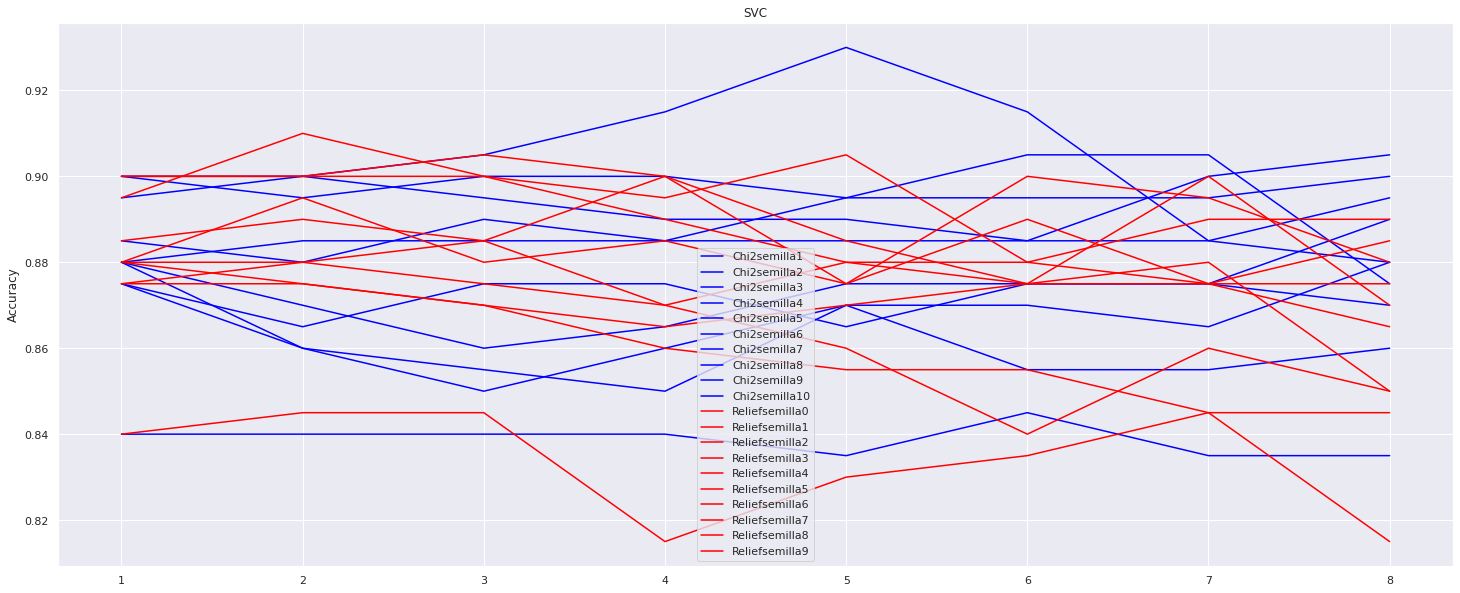

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Metricas

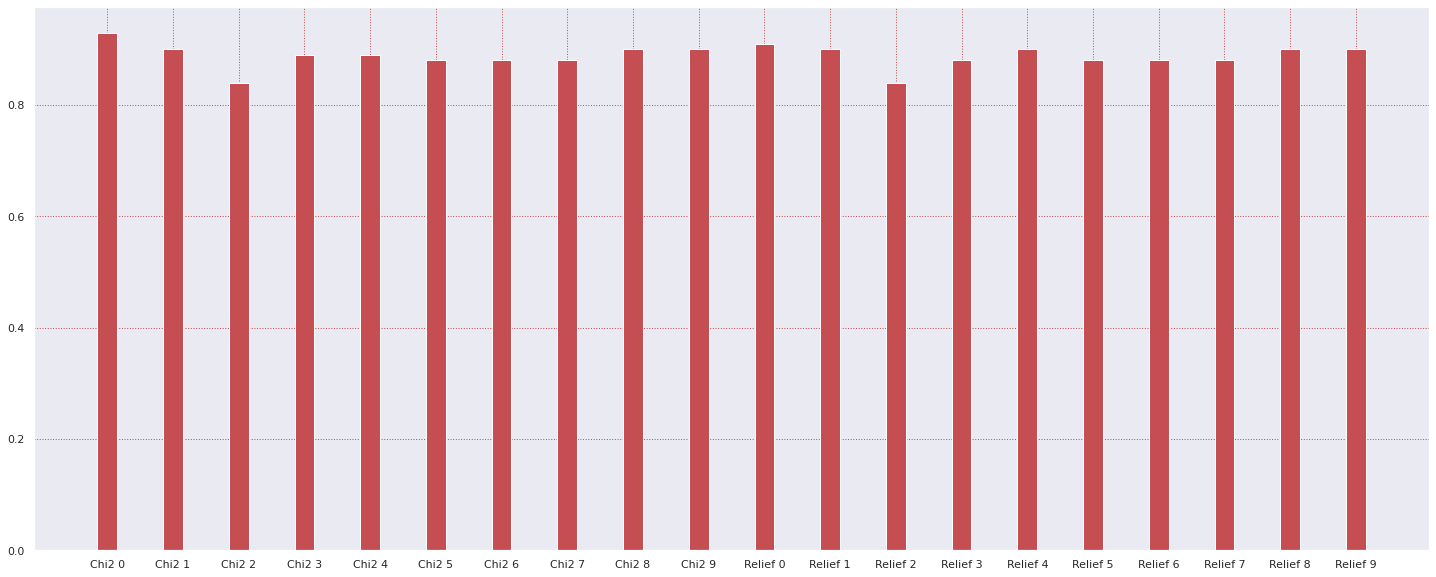

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9], [0.885, 0.885, 0.895, 0.895, 0.905, 0.905, 0.9, 0.9]]
[[0.885, 0.885, 0.89, 0.875, 0.87, 0.87, 0.85, 0.89], [0.885, 0.885, 0.89, 0.87, 0.865, 0.85, 0.865, 0.88], [0.885, 0.885, 0.89, 0.875, 0.89, 0.9, 0.895, 0.885], [0.885, 0.885, 0.89, 0.875, 0.89, 0.86, 0.865, 0.875], [0.885, 0.885, 0.89, 0.875, 0.865, 0.89, 0.855, 0.91], [0.885, 0.885, 0.885, 0.875, 0.885, 0.87, 0.86, 0.86], [0.885, 0.885, 0.89, 0.87, 0.895, 0.89, 0.845, 0.865], [0.885, 0.885, 0.89, 0.875, 0.87, 0.87, 0.87, 0.875], [0.885, 0.885, 0.885, 0

Text(0.5, 1.0, 'Logistic Regression')

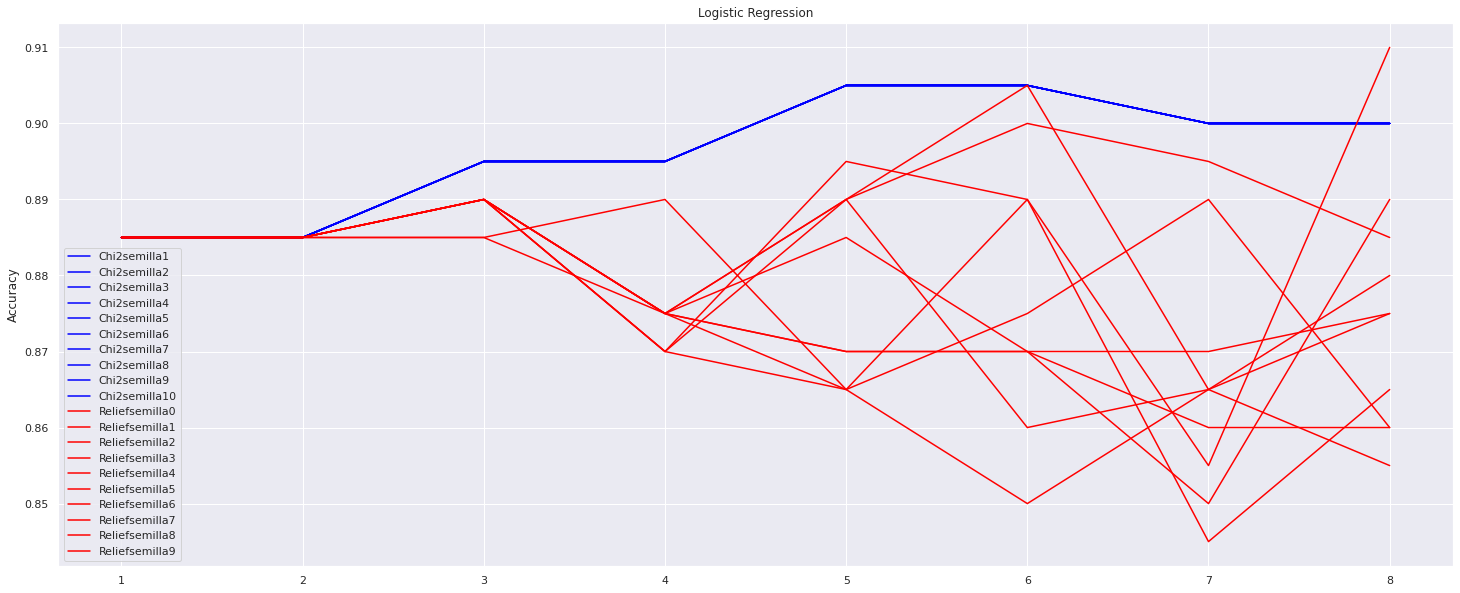

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

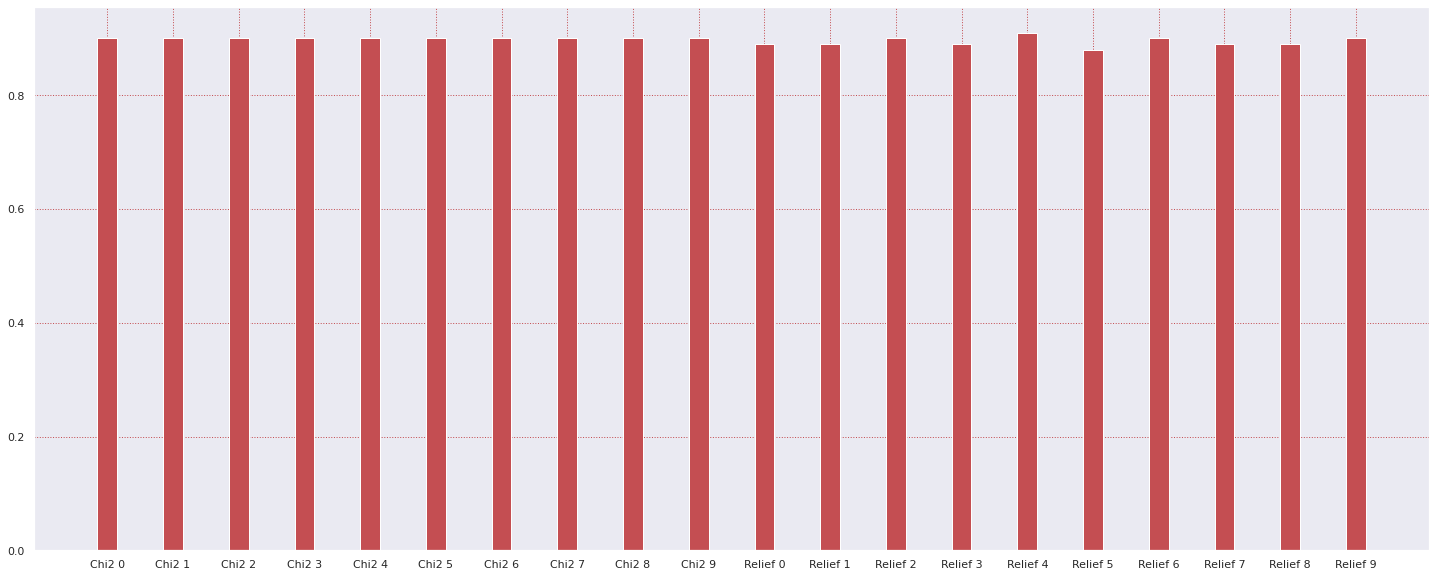

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 10 Características - Con 5 caracteristicas repetidas y 3 redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:

X,y = make_classification(n_samples = 1000, n_features = 10 ,n_repeated=5, n_redundant=3, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 10)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.825, 0.825, 0.825, 0.885, 0.895, 0.89, 0.89, 0.895], [0.845, 0.845, 0.845, 0.855, 0.855, 0.855, 0.855, 0.855], [0.84, 0.84, 0.84, 0.86, 0.86, 0.86, 0.85, 0.85], [0.865, 0.865, 0.865, 0.88, 0.885, 0.885, 0.89, 0.895], [0.815, 0.815, 0.815, 0.83, 0.835, 0.835, 0.84, 0.845], [0.885, 0.885, 0.885, 0.88, 0.89, 0.9, 0.89, 0.885], [0.81, 0.81, 0.81, 0.845, 0.845, 0.845, 0.845, 0.845], [0.825, 0.825, 0.825, 0.85, 0.85, 0.85, 0.85, 0.85], [0.825, 0.825, 0.82, 0.885, 0.885, 0.885, 0.88, 0.875], [0.875, 0.875, 0.875, 0.88, 0.88, 0.88, 0.88, 0.88]]
[[0.52, 0.635, 0.635, 0.675, 0.54, 0.56, 0.755, 0.315], [0.53, 0.665, 0.665, 0.61, 0.535, 0.535, 0.735, 0.375], [0.505, 0.61, 0.61, 0.645, 0.555, 0.565, 0.77, 0.27], [0.48, 0.625, 0.63, 0.675, 0.525, 0.555, 0.715, 0.355], [0.515, 0.62, 0.615, 0.6, 0.535, 0.545, 0.745, 0.325], [0.515, 0.605, 0.6, 0.54, 0.47, 0.465, 0.735, 0.285], [0.515, 0.61, 0.61, 0.66, 0.545, 0.565, 0.75, 0.36], [0.49, 0.615, 0.615, 0.72, 0.58, 0.605, 0.82, 0.345], [0.49, 0.58, 0.

Text(0.5, 1.0, 'SVC')

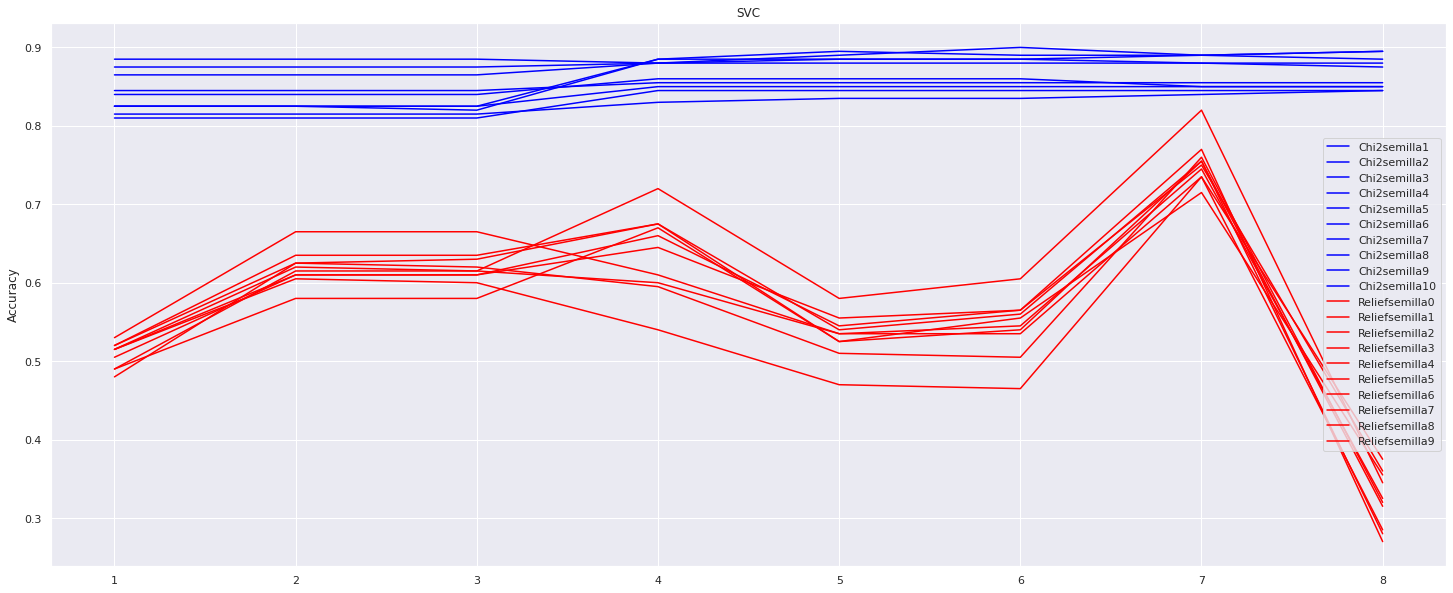

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86], [0.845, 0.845, 0.84, 0.86, 0.86, 0.86, 0.86, 0.86]]
[[0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 0.305], [0.535, 0.685, 0.47, 0.675, 0.6, 0.55, 0.815, 

Text(0.5, 1.0, 'Logistic Regression')

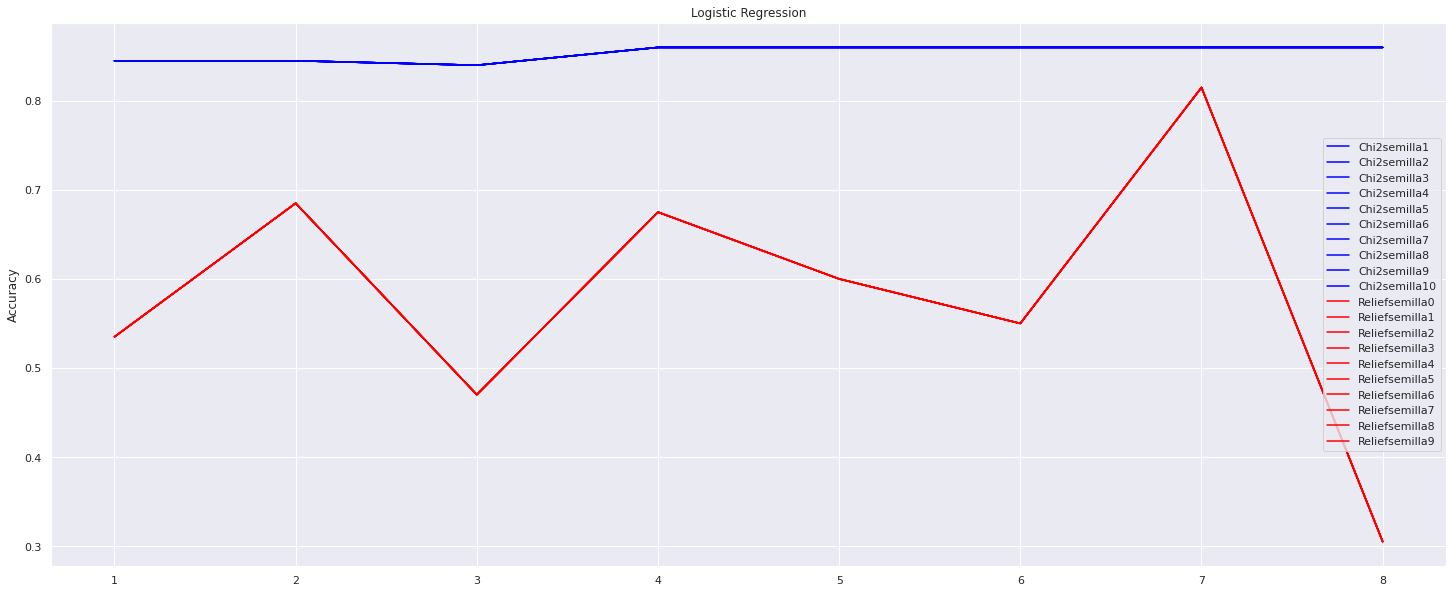

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

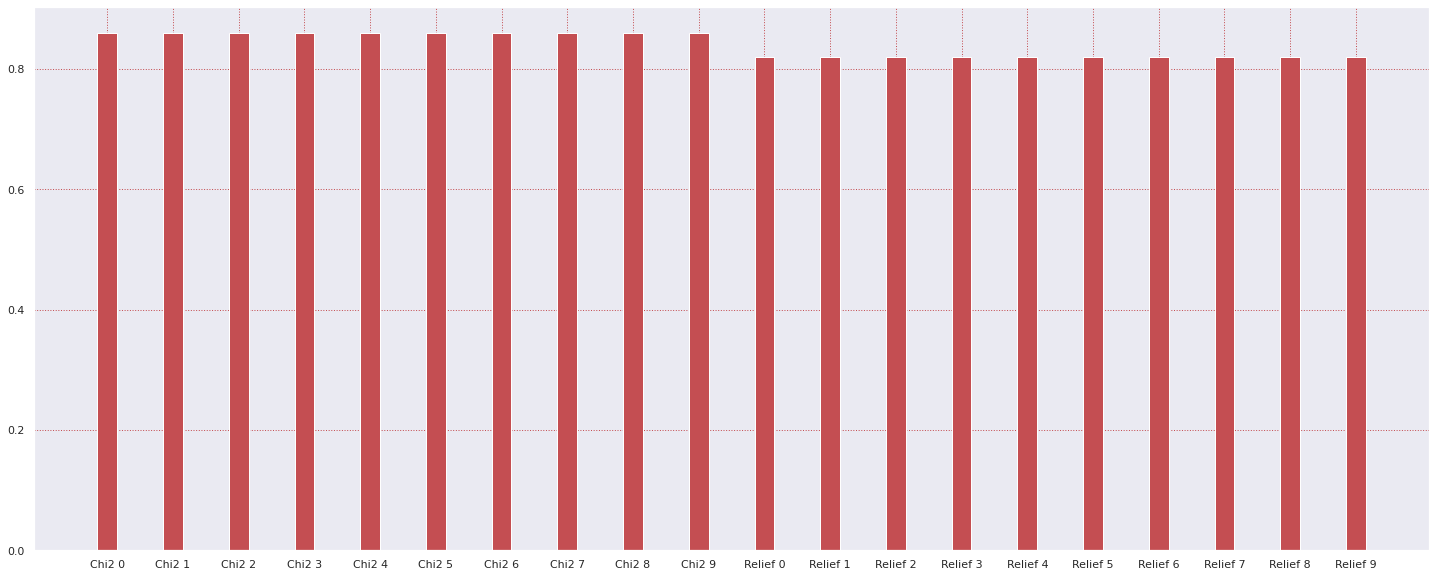

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

###Data set ficticio - 10 Características - Con 2 caracteristicas repetidas y 2 redundantes.

In [ ]:
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install sklearn_relief
import sklearn_relief as relief

In [ ]:

X,y = make_classification(n_samples = 1000, n_features = 10 ,n_repeated=2, n_redundant=2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 10)) #Solo Valores entre 0 y 200 para que sean positivos

X = scaler.fit_transform(X)

#### SVC

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []

Rel =[]


#Iteramos sobre la cantidad de atributos

for j in range(50,60):
  rel = []
  xi = []

  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
    
  
 
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = make_pipeline(StandardScaler(), SVC())
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))
    
    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=j) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.835, 0.855, 0.85, 0.845, 0.85, 0.855, 0.86, 0.855], [0.86, 0.86, 0.855, 0.86, 0.855, 0.855, 0.84, 0.835], [0.87, 0.88, 0.885, 0.88, 0.885, 0.885, 0.875, 0.87], [0.85, 0.855, 0.855, 0.855, 0.86, 0.865, 0.865, 0.865], [0.86, 0.855, 0.86, 0.855, 0.855, 0.86, 0.85, 0.845], [0.87, 0.865, 0.87, 0.87, 0.865, 0.87, 0.86, 0.855], [0.87, 0.87, 0.87, 0.87, 0.875, 0.87, 0.86, 0.865], [0.86, 0.855, 0.855, 0.85, 0.855, 0.87, 0.87, 0.87], [0.835, 0.83, 0.83, 0.835, 0.83, 0.83, 0.83, 0.825], [0.81, 0.82, 0.82, 0.82, 0.825, 0.815, 0.805, 0.81]]
[[0.55, 0.54, 0.51, 0.485, 0.565, 0.765, 0.78, 0.285], [0.49, 0.475, 0.48, 0.47, 0.505, 0.75, 0.715, 0.365], [0.495, 0.505, 0.47, 0.56, 0.52, 0.785, 0.755, 0.26], [0.495, 0.505, 0.48, 0.54, 0.535, 0.775, 0.76, 0.4], [0.525, 0.47, 0.485, 0.495, 0.5, 0.71, 0.75, 0.275], [0.555, 0.505, 0.455, 0.495, 0.46, 0.705, 0.785, 0.36], [0.52, 0.46, 0.475, 0.5, 0.49, 0.72, 0.73, 0.315], [0.545, 0.45, 0.54, 0.485, 0.765, 0.62, 0.745, 0.165], [0.51, 0.465, 0.485, 0.57, 0.52

Text(0.5, 1.0, 'SVC')

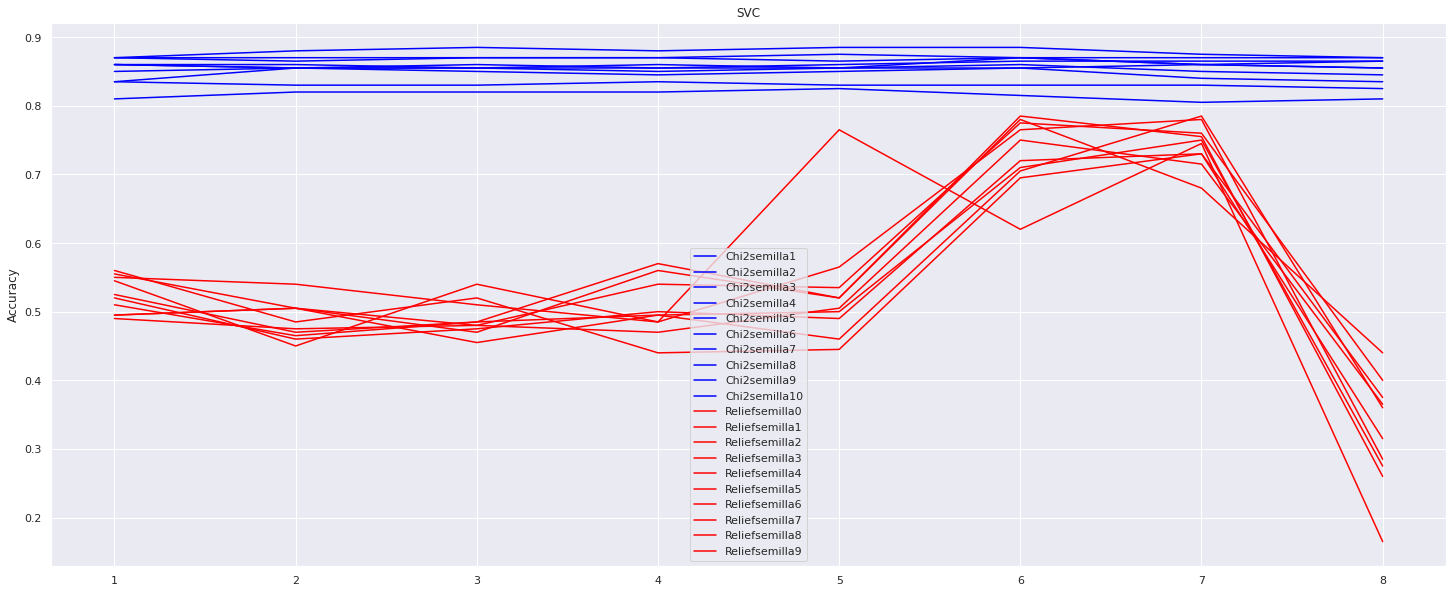

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('SVC')

#### Log Reg

In [ ]:
#Inicializamos 2 listas para guardar los valores de accuracy
Chi = []
Rel =[]

#Iteramos sobre la cantidad de atributos
for j in range(50,60):
  rel = []
  xi = []

  
  for i in range(1,X.shape[1]-1):

    X_newC = SelectKBest(chi2, k=i).fit_transform(X, y) #Filtramos los atributos mediante Chi2
  
    X_train_chi, X_val_chi, y_train_chi, y_val_chi = train_test_split(X_newC, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_chi = LogisticRegression()
    clf_chi.fit(X_train_chi, y_train_chi)

    y_pred_chi = clf_chi.predict(X_val_chi) #Obtenemos la predicción de nuestro modelo

    #Agregamos a la lista el accuracy
    xi.append(accuracy_score(y_val_chi, y_pred_chi))

    #Filtramos los atributos mediante Relief
    r = relief.Relief(n_features= i) 
    X_newr = r.fit_transform(X,y)
  
    X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_newr, y, test_size=0.2, random_state=42) #Hacemos un split

    #Inicializamos y entrenamos el modelo con los datos filtrados
    clf_r = LogisticRegression()
    clf_r.fit(X_train_r, y_train_r)

    y_pred_r = clf_chi.predict(X_val_r) #Obtenemos la predicción de nuestro modelo


    #Agregamos a la lista el accuracy
    rel.append(accuracy_score(y_val_r, y_pred_r))

  Chi.append(xi) 
  Rel.append(rel) 
print(Chi)
print(Rel)

[[0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87], [0.87, 0.875, 0.875, 0.875, 0.875, 0.87, 0.87, 0.87]]
[[0.53, 0.475, 0.53, 0.5, 0.555, 0.73, 0.82, 0.36], [0.53, 0.51, 0.51, 0.495, 0.48, 0.78, 0.75, 0.385], [0.53, 0.51, 0.56, 0.5, 0.495, 0.77, 0.74, 0.32], [0.53, 0.565, 0.56, 0.48, 0.55, 0.755, 0.82, 0.365], [0.53, 0.505, 0.56, 0.49, 0.555, 0.755, 0.58, 0.295], [0.465, 0.475, 0.565, 0.52, 0.51, 0.755, 0.8, 0.285], [0.53, 0.505, 0.425, 0.53, 0.52, 0.755, 0.76, 0.36], [0.53, 0.505, 0.47, 0.51, 0.52, 0.74, 0.76, 0.25], [0.49, 0.505, 0.505, 0.525, 0.495, 0.755

Text(0.5, 1.0, 'Logistic Regression')

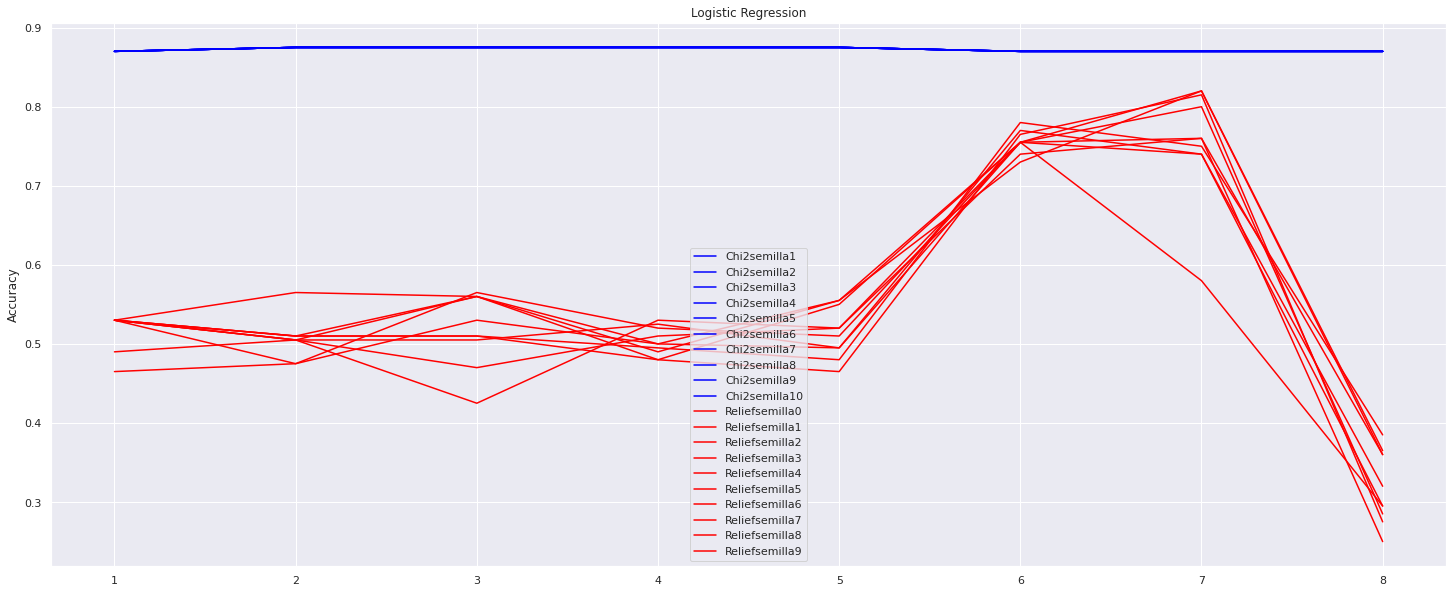

In [ ]:
plt.figure(figsize=(25,10))
h = 1
for i in Chi:
  plt.plot(range(1,X.shape[1]-1), i, label='Chi2' + '' + 'semilla' + str(h), color = 'blue')
  h += 1
h= 0
for i in Rel:
  plt.plot(range(1,X.shape[1]-1), i, label='Relief' + '' + 'semilla' + str(h), color = 'red')
  h += 1
plt.ylabel("Accuracy")
plt.legend()
plt.title('Logistic Regression')

#### Metricas 

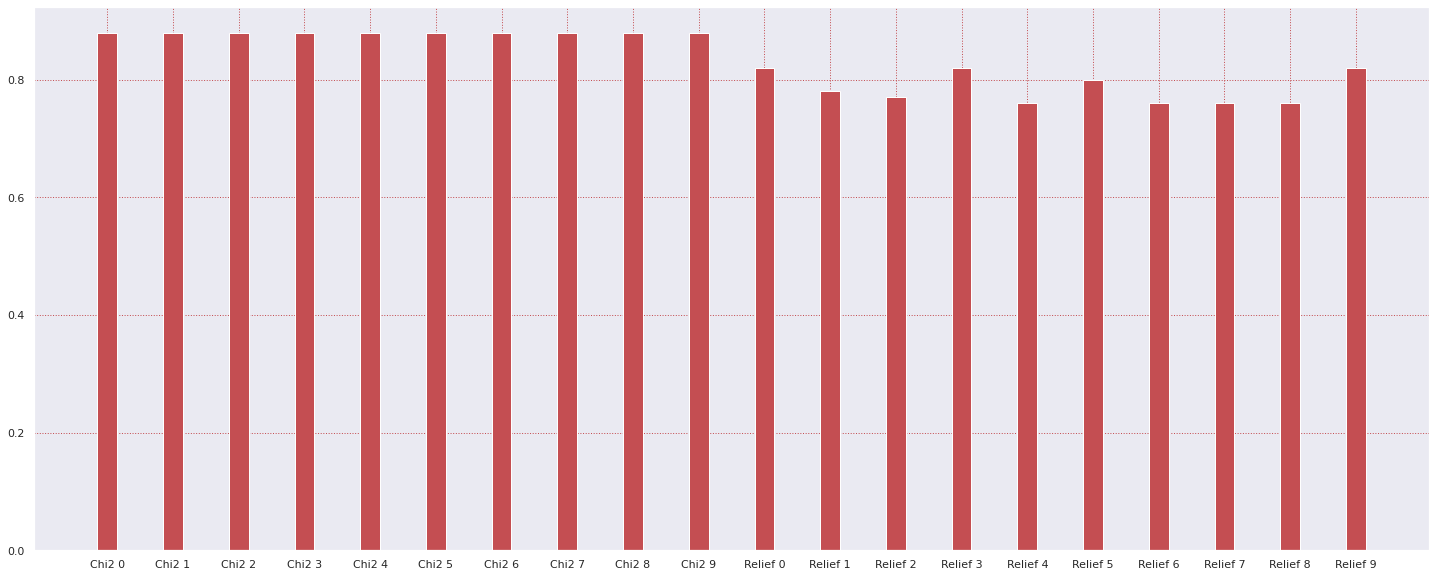

In [ ]:
metricas = {}
j = 0
for i in Chi:
  metricas['Chi2'+ ' ' +str(j)] = round(max(i),2)
  j = j +1

j = 0
for i in Rel:
  metricas['Relief'+ ' ' +str(j)] = round(max(i),2)
  j = j +1
plt.figure(figsize=(25,10))
plt.bar(metricas.keys(), metricas.values(),width = 0.3, color='r')
plt.grid(color='r', linestyle='dotted', linewidth=1)

# Desafío

In [ ]:
from google.colab import drive
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

In [ ]:
# hacer la conexión a Google Drive

colab_flag = True
if (colab_flag):
    from google.colab import drive
    drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dataset/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data = pd.read_csv(path + 'travel_packages_train.csv') #Drive

In [ ]:
data = pd.read_csv('travel_packages_train.csv')

## Estudio de datos

### Dataframe

In [ ]:
data.head()

Unnamed: 0  ... PPPrice
0        7919  ...   284.0
1         982  ...   129.0
2        3211  ...   311.0
3        3509  ...   517.0
4        4820  ...   336.0

[5 rows x 15 columns]

In [ ]:
data.columns

Index(['Unnamed: 0', 'Package Name', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Flight Stops', 'Meals',
       'Sightseeing Places Covered', 'Cancellation Rules', 'PPPrice'],
      dtype='object')

In [ ]:
#Revisamos los datos NaN
print("Número de datos NaN por feature: \n")
print(data.isnull().sum(axis = 0))

Número de datos NaN por feature: 

Unnamed: 0                    0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
PPPrice                       0
dtype: int64


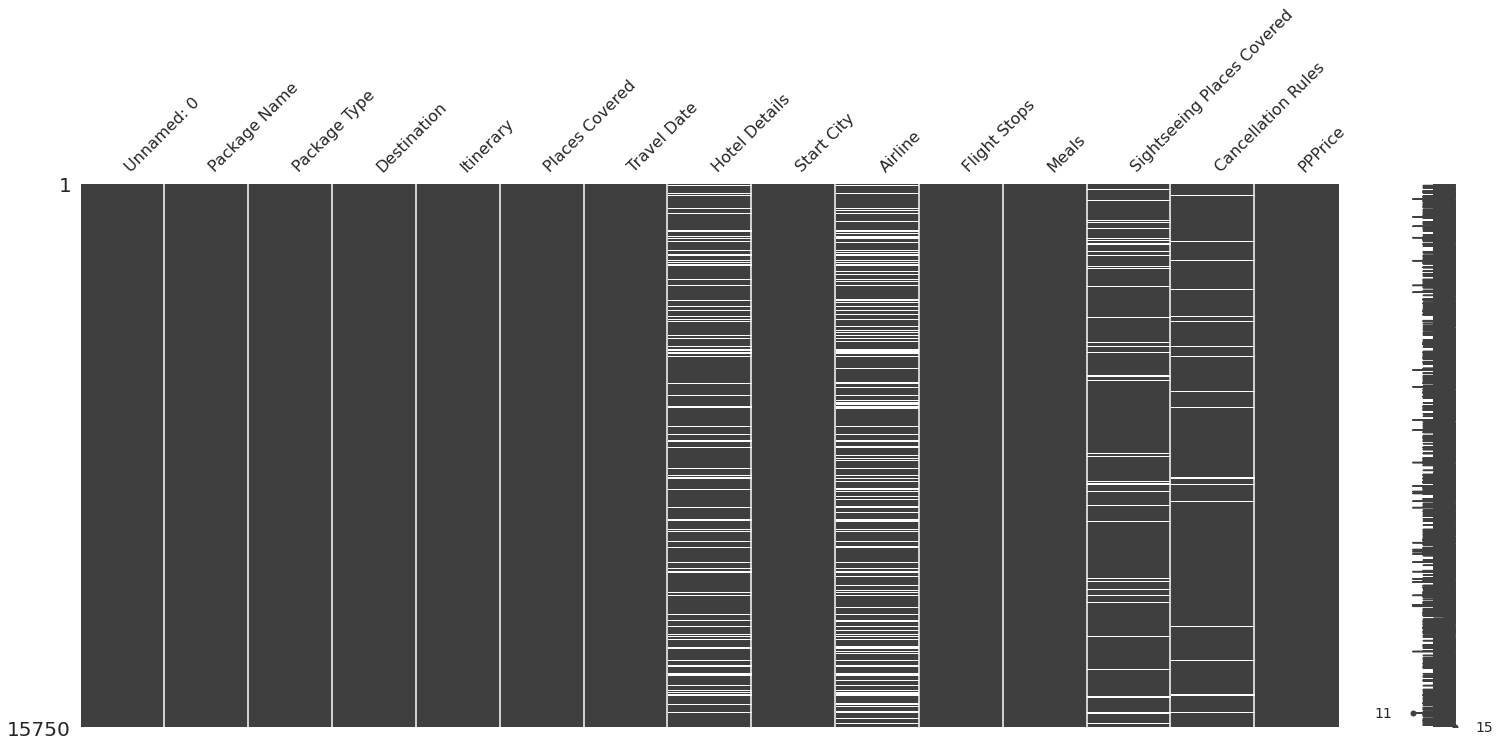

In [ ]:
# Program to visualize missing values in dataset
  
# Importing the libraries
import pandas as pd
import missingno as msno
  
# Loading the dataset

# Visualize missing values as a matrix
df_NAN = data.replace('Not Available', np.nan)
msno.matrix(df_NAN)

### Graficos 

In [ ]:
#Definimos una función para graficar los datos del dataframe

def plot_function(columna,alfa,tipo):

  aux_list = data[columna].tolist() #Copiamos la columna escogida y la transformamos a lista
  aux_dict = {} #Inicializamos un diccionario

  for aux_var in aux_list: #Iteramos sobre la lista 
    if tipo == 's': #Caso de que los componentes de la lista sean string
      for auxiliar in aux_var.lower().split("|"): #Iteramos sobre el string
        if auxiliar in aux_dict: #Vemos si la palabra ya a sido ocupada anteriormente y le sumamos una aparición
          aux_dict[auxiliar] += 1
        else:
          aux_dict[auxiliar] = 1
    else: #Caso de que la componentes de la columna sean enteros
      if aux_var in aux_dict:
        aux_dict[aux_var] += 1
      else:
        aux_dict[aux_var] = 1


  print(columna + " distintas:",len(aux_dict.keys())) #Imprimimos la cantidad de elementos distintos 

  plot_aux = {}

  #Graficamos el histograma 

  for aux_var in aux_dict.keys():
    if aux_dict[aux_var] > alfa:
      plot_aux[aux_var]= aux_dict[aux_var]

  plt.figure(figsize=(25,10))
  plt.xticks(rotation=45)
  plt.bar(plot_aux.keys(), plot_aux.values(),color='b',align='center') 


#### Precios

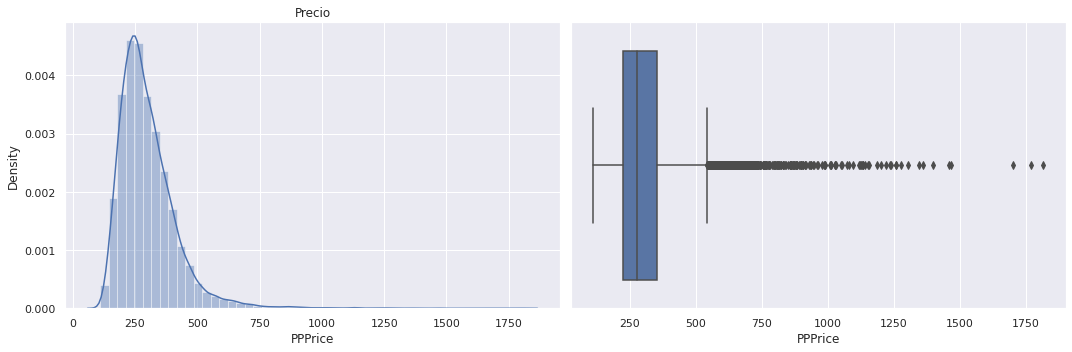

In [ ]:
#Graficamos la distribución de los precios 

fig, ax = plt.subplots(figsize=(15,5),ncols=2)
sns.distplot(data['PPPrice'],ax=ax[0])
sns.boxplot(x=data['PPPrice'],ax=ax[1])
ax[0].set_title('Precio')
ax[0].set_title('Precio')
fig.tight_layout()
plt.show()

#### Ciudades de partida

Start City distintas: 2


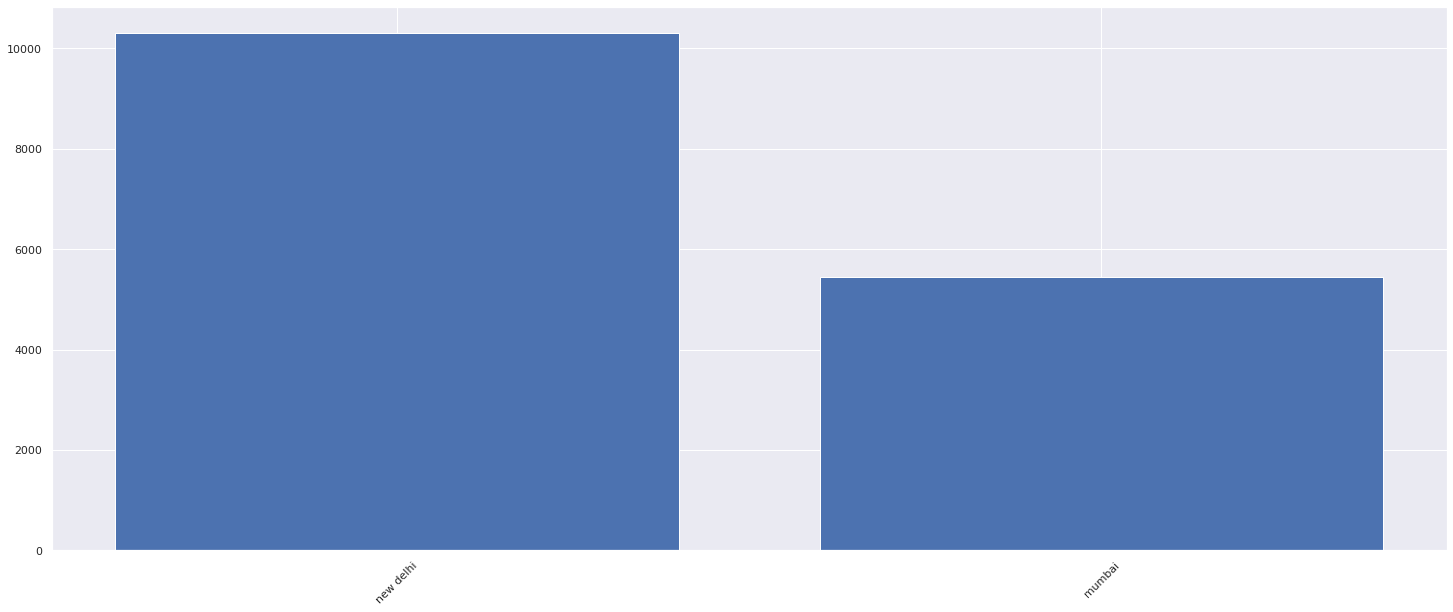

In [ ]:
plot_function('Start City',0,'s') #Graficamos la columna de ciudades de partida

#### Tipos de paquetes

Package Type distintas: 5


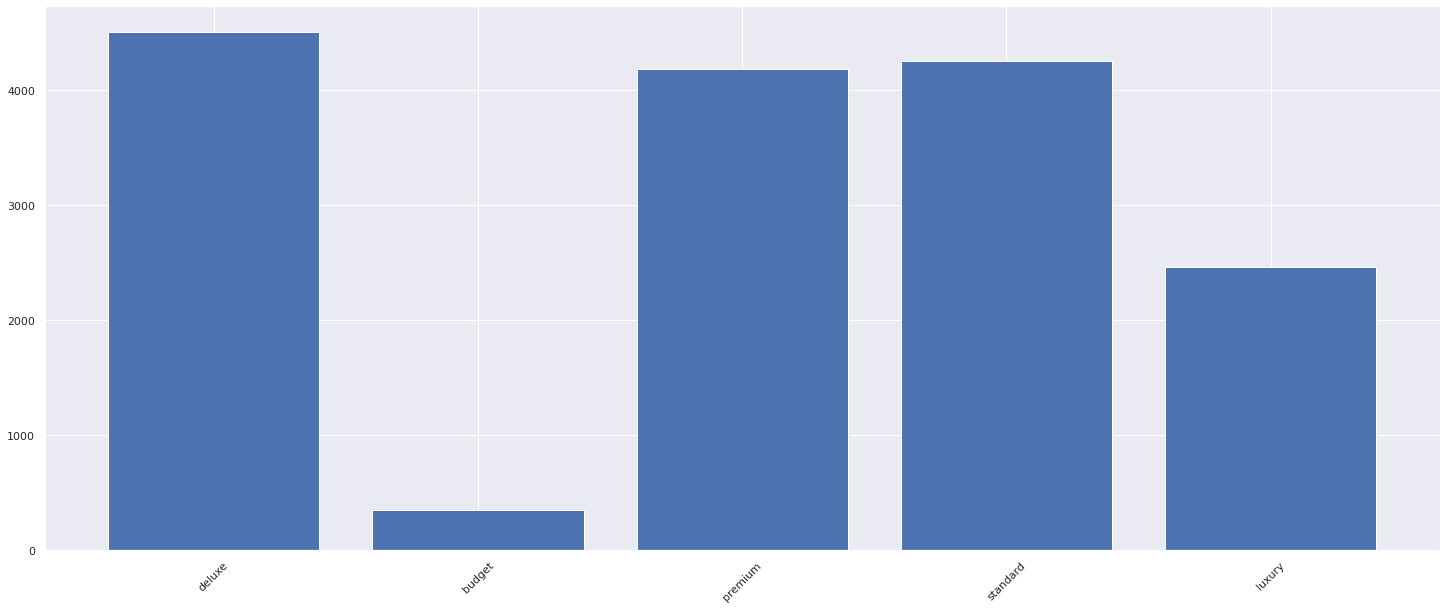

In [ ]:
plot_function('Package Type',0,'s') #Graficamos la columna de tipos de paquetes

#### Destinos frecuentes

Destination distintas: 182


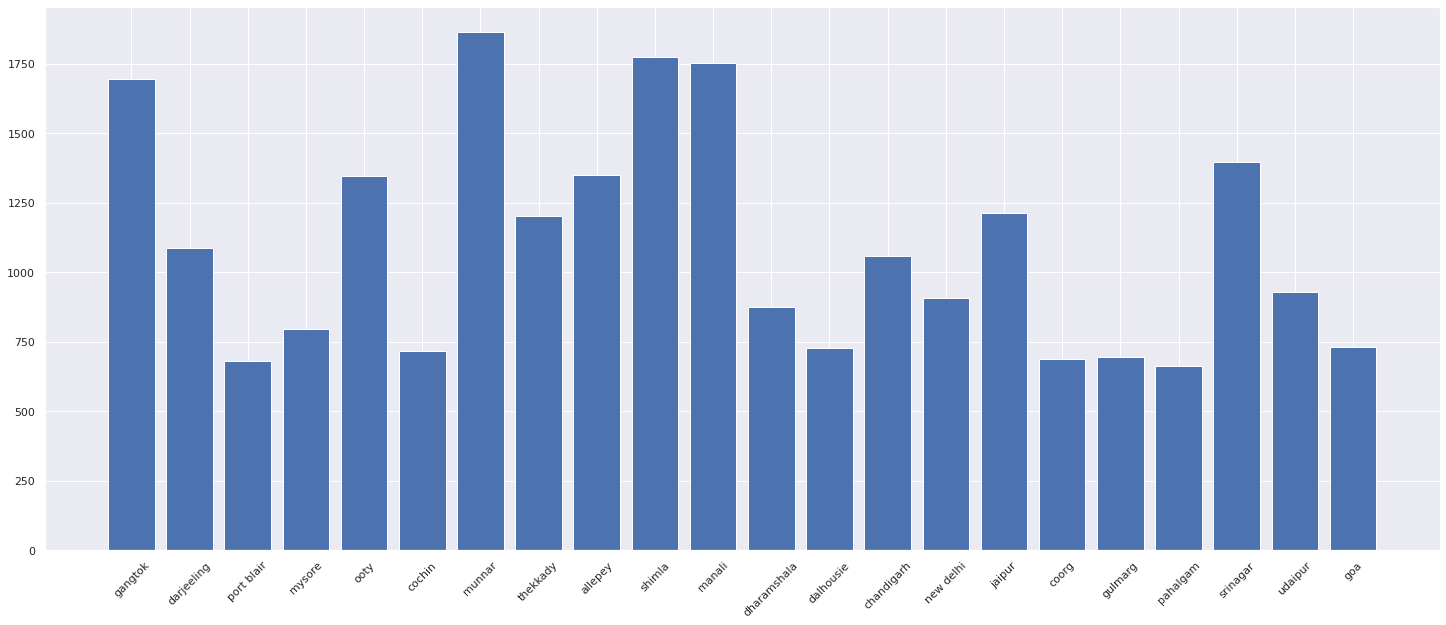

In [ ]:
plot_function('Destination',600,'s') #Graficamos la cantidad de destinos con una frecuencia mayor a 600 

#### Lugares cubiertos

Sightseeing Places Covered distintas: 1132


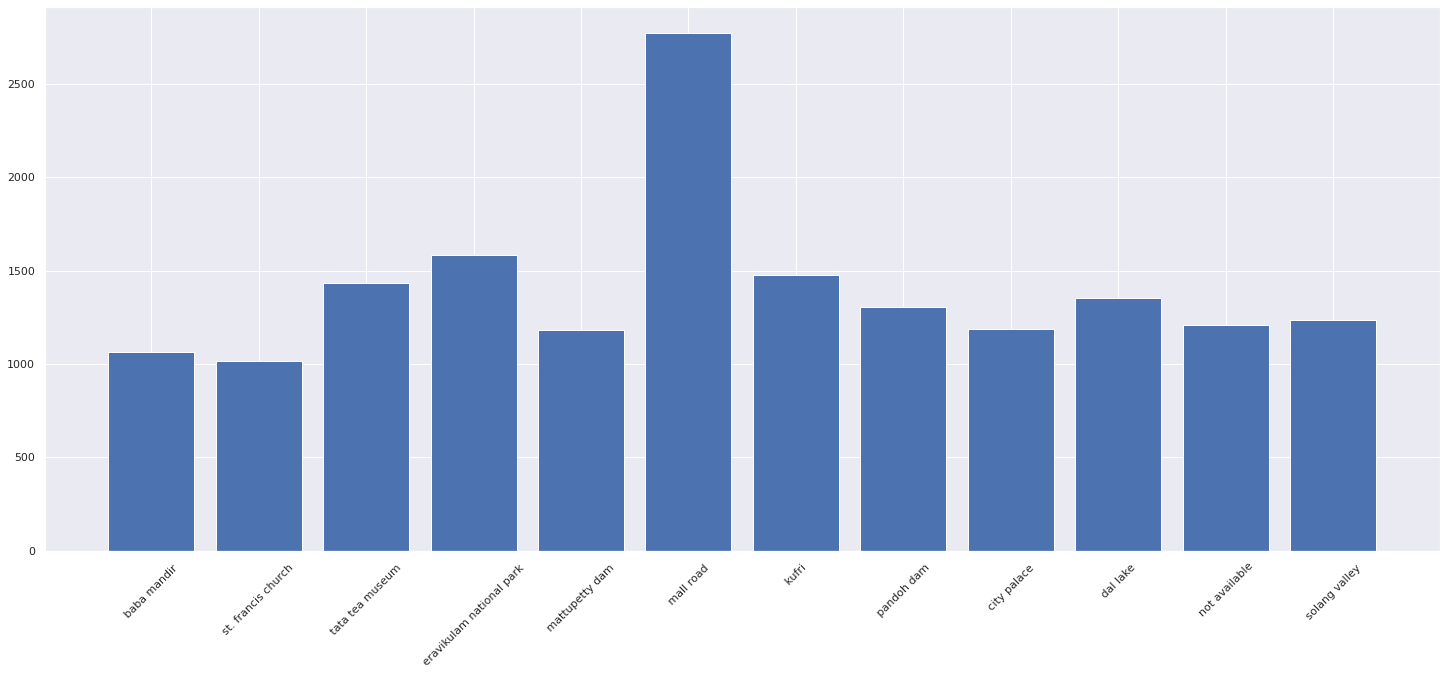

In [ ]:
plot_function('Sightseeing Places Covered',1000,'s') #Graficamos los lugares turisticos con frecuencia mayor a 1000

#### Aerolinias

Airline distintas: 56


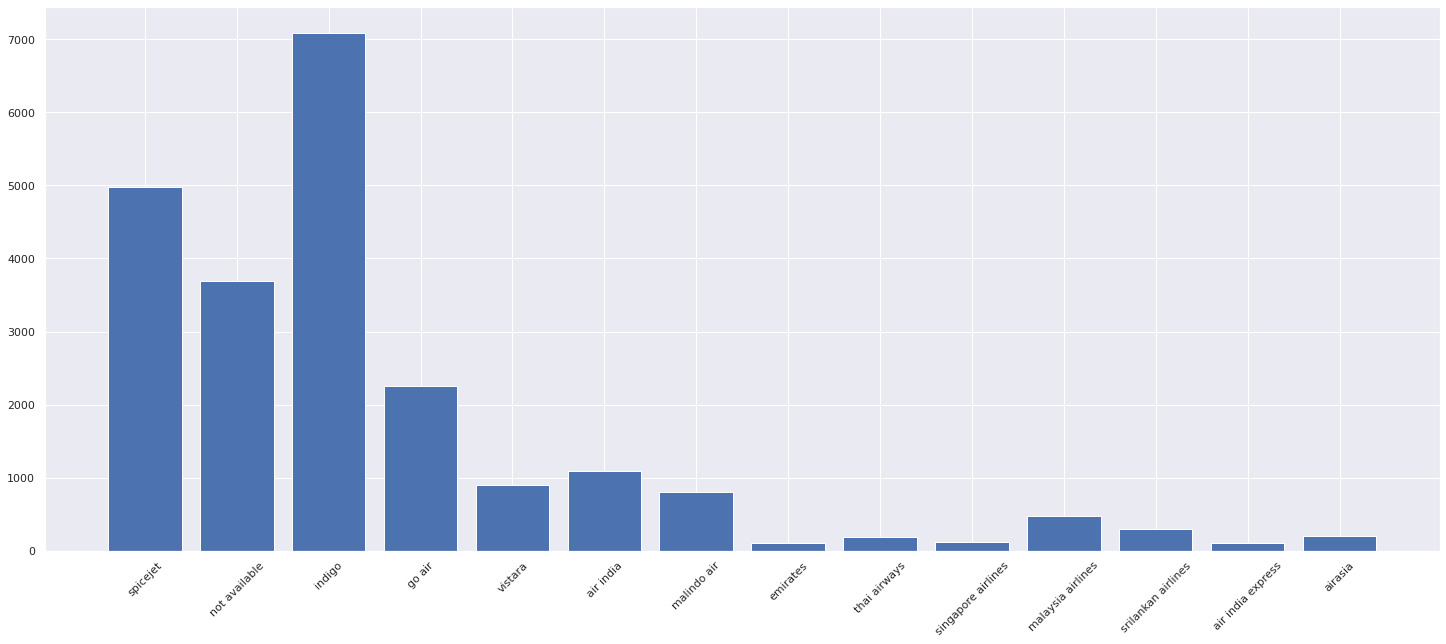

In [ ]:
plot_function('Airline',100,'s') #Graficamos las distintas aerolinias 

#### Comidas

Meals distintas: 4


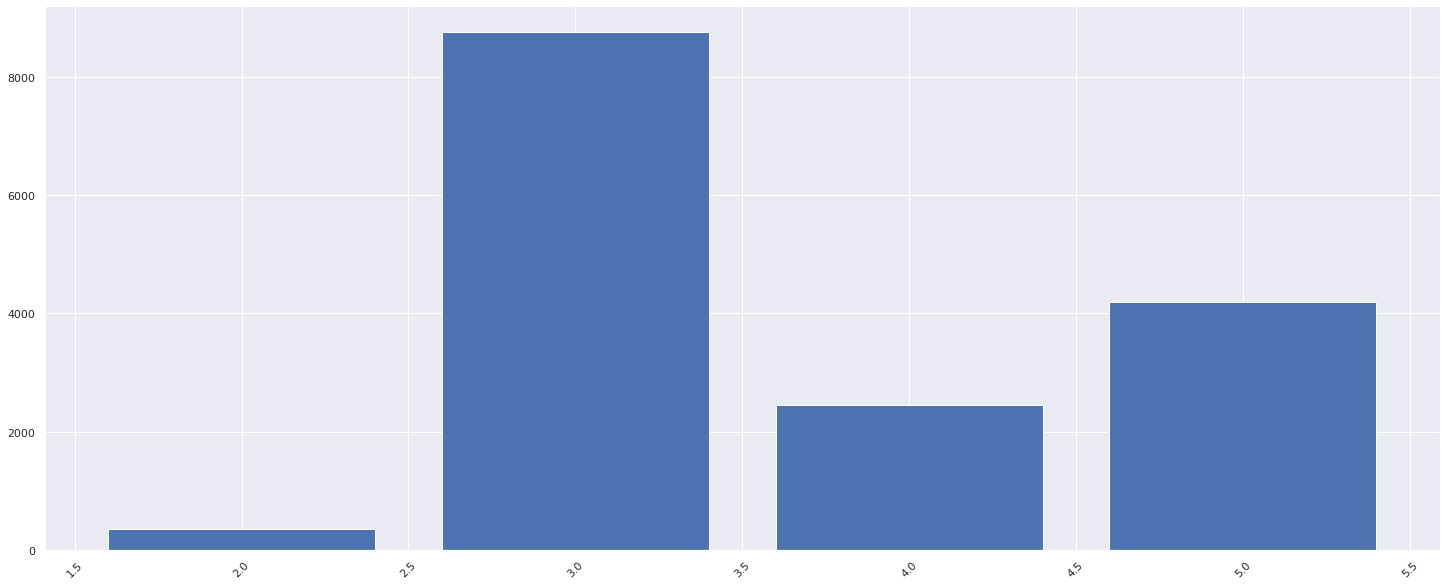

In [ ]:
plot_function('Meals',0,'i') #Graficamos la cantidad de comida

#### Escalas

Flight Stops distintas: 3


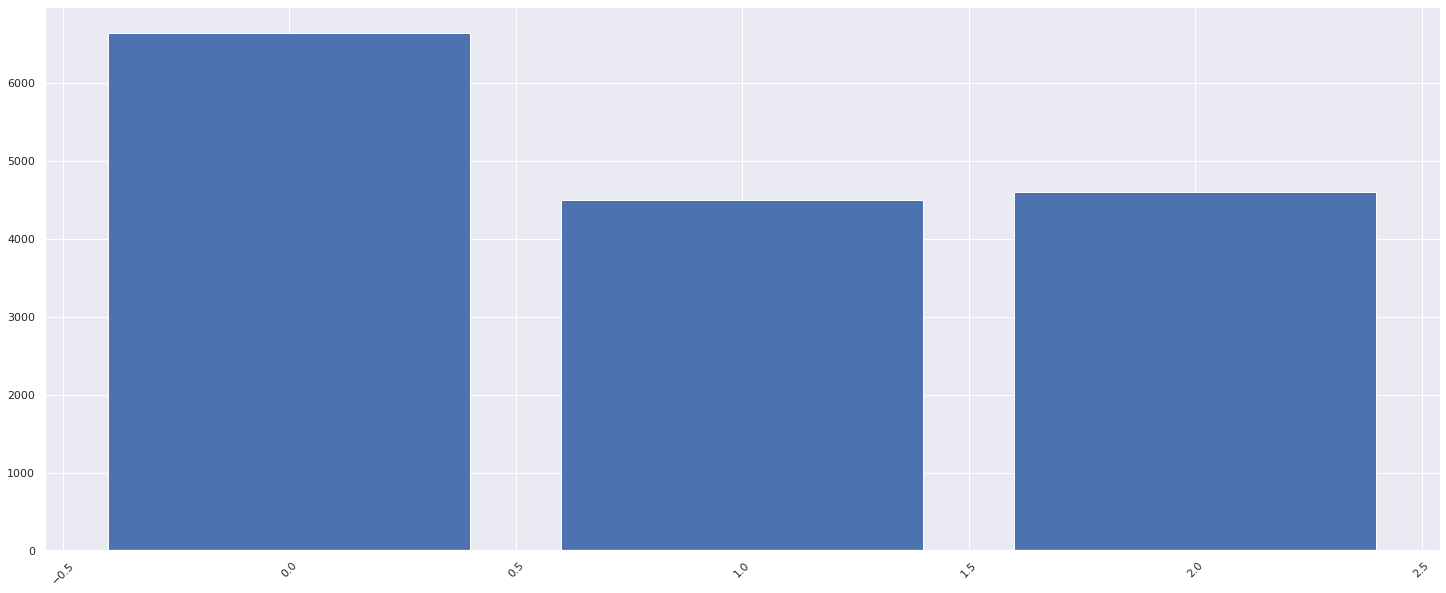

In [ ]:
plot_function('Flight Stops',0,'i') #Graficamos la cantidad de paradas

#### Noches

Cantidad de noches distintas: 8


<BarContainer object of 8 artists>

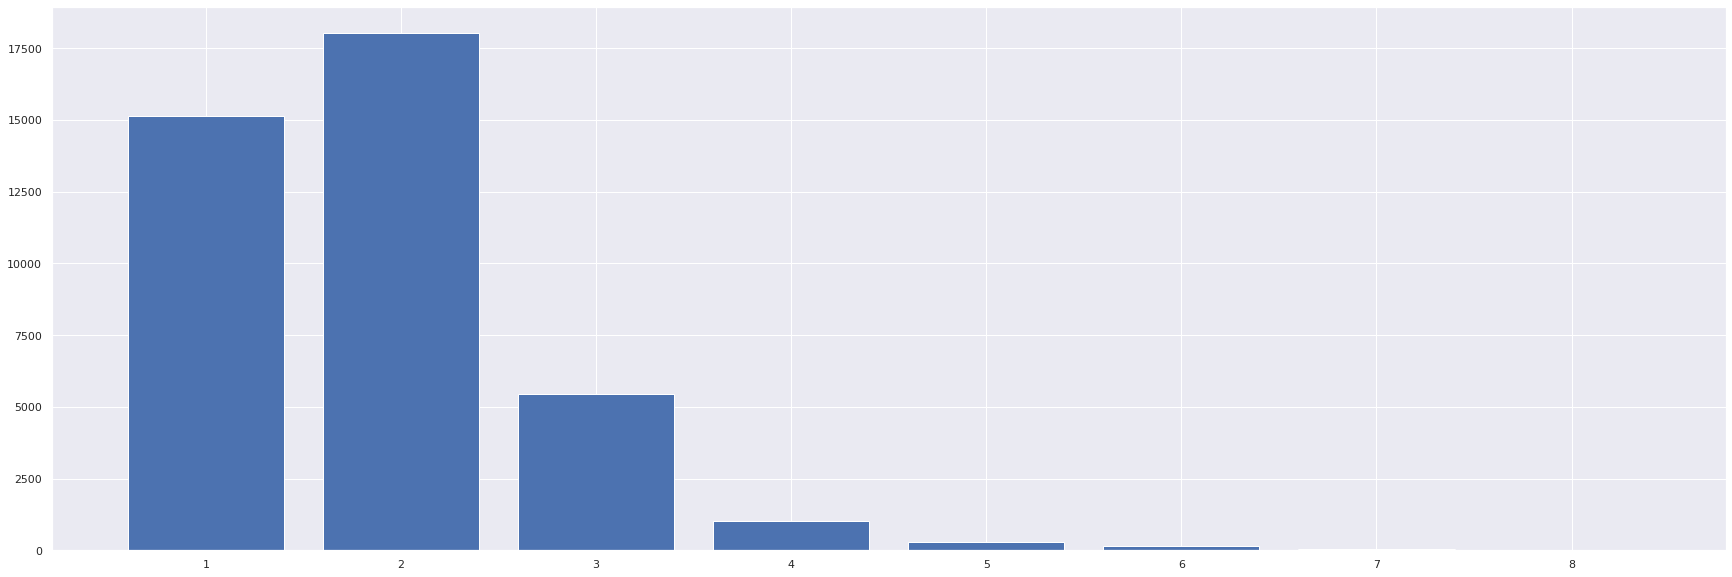

In [ ]:
#Trabajamos los datos de la columna Itinerary para calcular las noches totales

aux_dict = {}
aux_list = data['Itinerary'].tolist()

for itinerarios in aux_list:
  for noches in itinerarios.split('.'):
    noche = noches.split('N')[0].strip()
    if noche in aux_dict.keys():
      aux_dict[noche] += 1
    else:
      aux_dict[noche] = 1

print('Cantidad de noches distintas:',len(aux_dict.keys()))

plot_aux = {}

for aux_var in aux_dict.keys():
  if aux_dict[aux_var] > 0:
    plot_aux[aux_var]= aux_dict[aux_var]

plt.figure(figsize=(30,10))
plt.bar(plot_aux.keys(), plot_aux.values(),color='b')

## Primer acercamiento

### Procesado de texto

In [ ]:
#Transformamos los tipos de paquetes a enteros

def tipo_paquete(texto):
  if texto == 'Deluxe':
    return 5
  if texto == 'Premium':
    return 4
  if texto == 'Standard':
    return 3
  if texto == 'Luxury':
    return 2
  if texto == 'Budget':
    return 1

In [ ]:
#Trasnformamos de texto a entero el itinierario

def numero_noches(texto):
  cont = 0
  for dia in texto.split('.'):
    cont += int(dia.split('N')[0].strip())
  return cont 

In [ ]:
#Procesamos el dataframe 

def primer_procesado(data_original):
  data = data_original.copy()
  
  data['Itinerary'] = data.apply(lambda x: procesado_noches(x['Itinerary']),axis=1) #Con la columna itinerario calculamos las noches
  data['Package Type'] = data.apply(lambda x: procesado_paquetes(x['Package Type']),axis=1) #Con la columna tipos de paquetes cambiamos a entero el tipo
  
  data = data[['Itinerary','Flight Stops','Meals','Package Type','PPPrice',]] #Seleccionamos los datos a usar

  return data


In [ ]:
data_prueba = primer_procesado(data)
data_prueba.head()

Itinerary  Flight Stops  Meals  Package Type  PPPrice
0          4             1      3             5    284.0
1          2             2      2             1    129.0
2          4             0      5             4    311.0
3          5             0      5             4    517.0
4          5             1      3             5    336.0

### Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = data_prueba.drop(columns=['PPPrice']) #Definimos los atributos
y = data_prueba['PPPrice'] #Inicializamos el target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) #Dividimos los datos test y train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #Dividimos los datos val y train


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X,y Shapes: (15750, 4) (15750,)
X,y Train Shapes: (10080, 4) (10080,)
X,y Val Shapes: (2520, 4) (2520,)
X,y Test Shapes: (3150, 4) (3150,)


####Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression(normalize=True,positive=True) #Inicializamos y entrenamos el modelo de regresión lineal
modelo.fit(X_train, y_train)

LinearRegression(normalize=True, positive=True)

#### Ridge

In [ ]:
from sklearn import linear_model

#Calculamos los mejores parámetros para el modelo ridge
param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True], "positive":[True,False],"normalize": [True,False]}

modelo_2 = GridSearchCV(linear_model.Ridge(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_2.fit(X_train, y_train)
print(modelo_2.best_params_) 

Ridge()

#### Lasso

In [ ]:
#Calculamos los mejores parámetros para el modelo Lasso
param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True],
            'warm_start':[True,False], 'positive':[True,False],"normalize" : [True,False]}

modelo_3 = GridSearchCV(linear_model.Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_3.fit(X_train, y_train)

print(modelo_3.best_params_) 

Lasso(alpha=0.1, warm_start=True)

### Metrica

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = modelo.predict(X_val) #Predcimos los valores con el modelo de regresión
y_pred2 = modelo_2.predict(X_val) #Predcimos los valores con el modelo ridge
y_pred3 = modelo_3.predict(X_val) #Predcimos los valores con el modelo lasso

#Calculamos el valor de la métrica MAPE para cada modelo
mape = mean_absolute_percentage_error(y_val, y_pred)*100 
mape2 = mean_absolute_percentage_error(y_val, y_pred2)*100
mape3 = mean_absolute_percentage_error(y_val, y_pred3)*100

print('MAPE Regression: %.2f' % mape)
print('MAPE Ridge: %.2f' % mape2)
print('MAPE Lasso: %.2f' % mape3)

MAPE Regression: 22.02
MAPE Ridge: 21.32
MAPE Lasso: 21.32


### Grafico

In [ ]:
#Graficamos el mejor modelo según la métrica
plotdf = pd.DataFrame(y_pred3)
plotdf['indice'] = y_val.index.values.tolist()
plotdf = plotdf.set_index('indice')
plotdf.columns = ['predict']

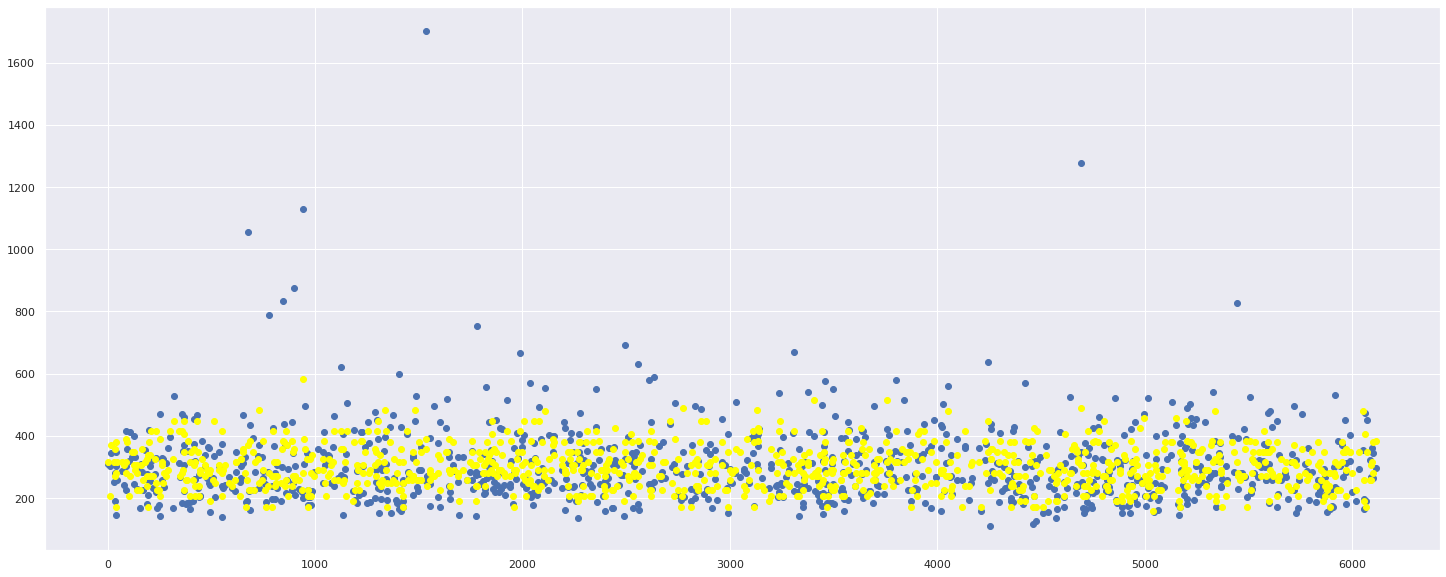

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(y_val.sort_index().head(1000),'o')
plt.plot(plotdf.sort_index().head(1000),'o',color='yellow')
plt.show()

## Segundo acercamiento

### Procesado de texto

Utilizamos el mismo procesado que el taller 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk 
nltk.download('wordnet') # WordNet® is a large lexical database of English. 
nltk.download('stopwords') 
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer # para transformar palabrasa a su raiz
from nltk.stem import WordNetLemmatizer 

remove_stops_here = True
stemmer = SnowballStemmer("english") 
tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def my_pre_processer(text, debug = False):
    results = []
    if (debug):
        print("Tokenizer result: ", tokenizer(text))
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('english')):
          continue
        token_pro = stemmer.stem(clean_token) #probamos stemming
        if len(token_pro) > 3 and not token_pro[0].isdigit(): #elimina palabra largo menor a 3
            results.append(token_pro)
    return results

In [ ]:
#Inicializamos un vectorizador para cada atributo string
vectorizer_paises = CountVectorizer()
vectorizer_turisticos = CountVectorizer(tokenizer=my_pre_processer)
vectorizer_airline = CountVectorizer(tokenizer=my_pre_processer)
vectorizer_nombres = CountVectorizer(tokenizer=my_pre_processer)
vectorizer_hotel = CountVectorizer(tokenizer=my_pre_processer)
vectorizer_cancelar = CountVectorizer(tokenizer=my_pre_processer)

#Ajustamos el vectorizador para cada atributo
vectorizer_paises.fit(data['Destination'])
vectorizer_turisticos.fit(data['Sightseeing Places Covered'])
vectorizer_airline.fit(data['Airline'])
vectorizer_nombres.fit(data['Package Name'])
vectorizer_hotel.fit(data['Hotel Details'])
vectorizer_cancelar.fit(data['Cancellation Rules'])

#Printiamos el diccionario usado por cada vectorizador
print(vectorizer_paises.vocabulary_)
print(vectorizer_turisticos.vocabulary_)
print(vectorizer_airline.vocabulary_)
print(vectorizer_nombres.vocabulary_)
print(vectorizer_hotel.vocabulary_)
print(vectorizer_cancelar.vocabulary_)

{'gangtok': 55, 'lachung': 108, 'haridwar': 65, 'jodhpur': 76, 'jaisalmer': 72, 'thimpu': 186, 'paro': 146, 'pelling': 150, 'darjeeling': 46, 'port': 157, 'blair': 25, 'havelock': 67, 'niel': 136, 'island': 70, 'bangalore': 18, 'mysore': 127, 'ooty': 139, 'cochin': 37, 'munnar': 125, 'thekkady': 185, 'allepey': 7, 'shimla': 175, 'manali': 117, 'dharamshala': 49, 'dalhousie': 43, 'chandigarh': 29, 'phuket': 154, 'bangkok': 19, 'new': 135, 'delhi': 47, 'agra': 1, 'jaipur': 71, 'pushkar': 161, 'kodaikanal': 96, 'kuala': 101, 'lumpur': 113, 'coorg': 39, 'wayanad': 197, 'bikaner': 23, 'gulmarg': 61, 'pahalgam': 142, 'srinagar': 182, 'madurai': 114, 'rameshwaram': 163, 'kanyakumari': 85, 'kovalam': 99, 'and': 11, 'poovar': 156, 'ranthambhore': 166, 'udaipur': 192, 'mount': 123, 'abu': 0, 'tirupati': 188, 'kasol': 87, 'kumarakom': 103, 'chennai': 30, 'mahabalipuram': 115, 'guwahati': 62, 'cherrapunjee': 31, 'shillong': 174, 'amritsar': 10, 'bali': 16, 'bandipur': 17, 'paris': 145, 'mussoorie'

In [ ]:
#Transformamos los tipos de paquetes a enteros

def procesado_paquetes(texto):
  if texto == 'Deluxe':
    return 5
  if texto == 'Premium':
    return 4
  if texto == 'Standard':
    return 3
  if texto == 'Luxury':
    return 2
  if texto == 'Budget':
    return 1

In [ ]:
#Trasnformamos de texto a entero el itinierario

def procesado_noches(texto):
  cont = 0
  for dia in texto.split('.'):
    cont += int(dia.split('N')[0].strip())
  return cont 

In [ ]:
#Función para procesar los datos

def segundo_procesado(data_original):

  data = data_original.copy()

  #Regularizamos el texto para cada columna 
  data['Destination'] = data.apply(lambda x: ' '.join(x['Destination'].lower().split('|')),axis=1)
  data['Airline'] = data.apply(lambda x: ' '.join(x['Airline'].lower().split('|')),axis=1)
  data['Sightseeing Places Covered'] = data.apply(lambda x: ' '.join(x['Sightseeing Places Covered'].lower().split('|')),axis=1)
  data['Itinerary'] = data.apply(lambda x: procesado_noches(x['Itinerary']),axis=1)
  data['Package Type'] = data.apply(lambda x: procesado_paquetes(x['Package Type']),axis=1)

  #Dropeamos las columnas que no usaremos
  data = data.drop(columns=['Places Covered','Travel Date','Start City'])

  #Vectorizamos todos los textos de las columnas
  X = vectorizer_paises.transform(data['Destination']) 
  Y = vectorizer_turisticos.transform(data['Sightseeing Places Covered'])
  Z = vectorizer_airline.transform(data['Airline'])
  H = vectorizer_hotel.transform(data['Hotel Details'])
  N = vectorizer_nombres.transform(data['Package Name'])
  C = vectorizer_cancelar.transform(data['Cancellation Rules'])

  #Pasamos a dataframe los vectores de los textos
  count_vect_df_countries = pd.DataFrame(X.todense(), columns=vectorizer_paises.get_feature_names())
  count_vect_df_turist = pd.DataFrame(Y.todense(), columns=vectorizer_turisticos.get_feature_names())
  count_vect_df_airline = pd.DataFrame(Z.todense(), columns=vectorizer_airline.get_feature_names())
  count_vect_df_hotel = pd.DataFrame(H.todense(), columns=vectorizer_hotel.get_feature_names())
  count_vect_df_nombre = pd.DataFrame(N.todense(), columns=vectorizer_nombres.get_feature_names())
  count_vect_df_cancelar = pd.DataFrame(C.todense(), columns=vectorizer_cancelar.get_feature_names())

  #Concatenamos los vectores al dataframe original
  data = pd.concat([data, count_vect_df_countries], axis=1)
  data = pd.concat([data, count_vect_df_airline], axis=1)
  data = pd.concat([data, count_vect_df_turist], axis=1)
  data = pd.concat([data, count_vect_df_hotel], axis=1)
  data = pd.concat([data, count_vect_df_nombre], axis=1)
  data = pd.concat([data, count_vect_df_cancelar], axis=1)

  #Dropeamos las columnas transformadas 
  data = data.drop(columns=['Destination','Sightseeing Places Covered','Airline','Hotel Details','Package Name','Cancellation Rules'])

  return data #Retornamos el dataframe ya procesado

### Procesamiento de los datos

In [ ]:
df_prueba2 = segundo_procesado(data).drop(columns = ["Unnamed: 0"])

In [ ]:
df_prueba2.head()

Package Type  Itinerary  Flight Stops  ...  would  year  youperson
0             5          4             1  ...      4     0          0
1             1          2             2  ...      4     0          0
2             4          4             0  ...      4     0          0
3             4          5             0  ...      4     0          0
4             5          5             1  ...      4     0          0

[5 rows x 3899 columns]

#### PCA

In [ ]:
#Definimos los atributos y target

X = df_prueba2.drop(columns=['PPPrice'])
y = df_prueba2['PPPrice']

In [ ]:
#Elegimos los mejores 1600 atributos

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

j = 1600 #Cantidad de atributos final
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components = j, svd_solver = 'randomized')) #Inicializamos nuestra función para pca
df_PCA = pd.DataFrame(pca_pipe.fit_transform(X)) #Filtramos los datos

df_PCA.columns = ["PC"+str(i+1) for i in range(j)] 

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
#Imprimimos las variancias del modelo PCA
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)
percent_variance_cum[j-50:j] 

array([97.57, 97.58, 97.59, 97.6 , 97.61, 97.62, 97.63, 97.64, 97.65,
       97.66, 97.67, 97.68, 97.69, 97.7 , 97.71, 97.72, 97.73, 97.74,
       97.75, 97.76, 97.77, 97.78, 97.79, 97.8 , 97.81, 97.82, 97.83,
       97.84, 97.85, 97.86, 97.87, 97.88, 97.89, 97.9 , 97.91, 97.92,
       97.93, 97.94, 97.95, 97.96, 97.97, 97.98, 97.99, 98.  , 98.01,
       98.02, 98.03, 98.04, 98.05, 98.06])

In [ ]:
#Divimos la data ya filtrada por el PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = df_PCA

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X,y Shapes: (15750, 1600) (15750,)
X,y Train Shapes: (10080, 1600) (10080,)
X,y Val Shapes: (2520, 1600) (2520,)
X,y Test Shapes: (3150, 1600) (3150,)


#### Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Nos aseguramos que no existan valores negativos para poder utilizar Chi2 

scaler = MinMaxScaler(feature_range=(0, 500)) #Solo Valores entre 0 y 200 para que sean positivos

X_chi = scaler.fit_transform(X)

In [ ]:
Chi2 = SelectKBest(chi2, k=1500).fit_transform(X_chi, y) #Elegimos los mejores 1500 atributos

In [ ]:
#Divimos la data ya filtrada por el Chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = Chi2

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X,y Shapes: (15750, 1500) (15750,)
X,y Train Shapes: (10080, 1500) (10080,)
X,y Val Shapes: (2520, 1500) (2520,)
X,y Test Shapes: (3150, 1500) (3150,)


### Modelo

#### Regresión lineal

In [ ]:
#Inicializamos y entrenamos el modelo de regresión lineal

from sklearn.linear_model import LinearRegression
   
modelo = LinearRegression(normalize=True,positive=True)

modelo.fit(X_train, y_train) 

LinearRegression(normalize=True, positive=True)

#### Ridge

In [ ]:
from sklearn import linear_model

#Calculamos los mejores parámetros para el modelo ridge y entrenamos el modelo

param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True], "positive":[True,False],"normalize": [True,False]}

modelo_2 = GridSearchCV(linear_model.Ridge(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_2.fit(X_train, y_train)
print(modelo_2.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 1.0, 'fit_intercept': True, 'normalize': True, 'positive': False}


#### Lasso

In [ ]:
#Calculamos los mejores parámetros para el modelo lasso y entrenamos el modelo

param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True],
            'warm_start':[True,False], 'positive':[True,False],"normalize" : [True,False]}

modelo_3 = GridSearchCV(linear_model.Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_3.fit(X_train, y_train)

print(modelo_3.best_params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 1.0, 'fit_intercept': True, 'normalize': False, 'positive': False, 'warm_start': True}


### Metrica

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = modelo.predict(X_val) #Predcimos los valores con el modelo de regresión
y_pred2 = modelo_2.predict(X_val) #Predcimos los valores con el modelo ridge
y_pred3 = modelo_3.predict(X_val) #Predcimos los valores con el modelo lasso

#Calculamos el valor de la métrica MAPE para cada modelo
mape = mean_absolute_percentage_error(y_val, y_pred)*100 
mape2 = mean_absolute_percentage_error(y_val, y_pred2)*100
mape3 = mean_absolute_percentage_error(y_val, y_pred3)*100

print('MAPE Regression: %.2f' % mape)
print('MAPE Ridge: %.2f' % mape2)
print('MAPE Lasso: %.2f' % mape3)

MAPE Regression: 22.95
MAPE Ridge: 18.34
MAPE Lasso: 12.74


### Grafico

In [ ]:
#Graficamos el mejor modelo según la métrica
plotdf = pd.DataFrame(y_pred3)
plotdf['indice'] = y_val.index.values.tolist()
plotdf = plotdf.set_index('indice')
plotdf.columns = ['predict']

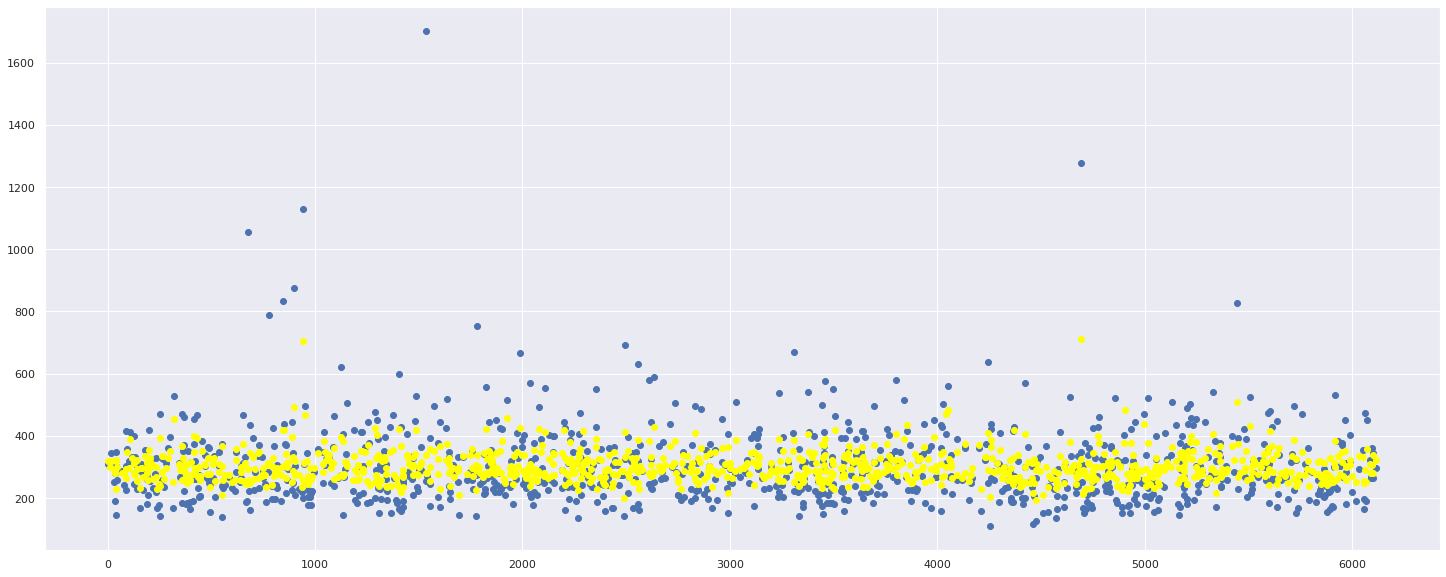

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(y_val.sort_index().head(1000),'o')
plt.plot(plotdf.sort_index().head(1000),'o',color='yellow')
plt.show()

## Modelo final


### Procesado de texto


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk 
nltk.download('wordnet') # WordNet® is a large lexical database of English. 
nltk.download('stopwords') 
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer # para transformar palabrasa a su raiz
from nltk.stem import WordNetLemmatizer # 

remove_stops_here = True
stemmer = SnowballStemmer("english") 
tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters

In [ ]:
def my_pre_processer(text, debug = False):
    results = []
    if (debug):
        print("Tokenizer result: ", tokenizer(text))
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('english')):
          continue
        token_pro = stemmer.stem(clean_token) #probamos stemming
        if len(token_pro) > 3 and not token_pro[0].isdigit(): #elimina palabra largo menor a 3
            results.append(token_pro)
    return results

In [ ]:
#Inicializamos un vectorizador para cada atributo string
vectorizer_paises = CountVectorizer()
vectorizer_turisticos = CountVectorizer(tokenizer=my_pre_processer)
vectorizer_airline = CountVectorizer(tokenizer=my_pre_processer)

#Ajustamos el vectorizador para cada atributo
vectorizer_paises.fit(data['Destination'])
vectorizer_turisticos.fit(data['Sightseeing Places Covered'])
vectorizer_airline.fit(data['Airline'])

#Printiamos el diccionario usado por cada vectorizador
print(vectorizer_paises.vocabulary_)
print(vectorizer_turisticos.vocabulary_)
print(vectorizer_airline.vocabulary_)

{'gangtok': 55, 'lachung': 108, 'haridwar': 65, 'jodhpur': 76, 'jaisalmer': 72, 'thimpu': 186, 'paro': 146, 'pelling': 150, 'darjeeling': 46, 'port': 157, 'blair': 25, 'havelock': 67, 'niel': 136, 'island': 70, 'bangalore': 18, 'mysore': 127, 'ooty': 139, 'cochin': 37, 'munnar': 125, 'thekkady': 185, 'allepey': 7, 'shimla': 175, 'manali': 117, 'dharamshala': 49, 'dalhousie': 43, 'chandigarh': 29, 'phuket': 154, 'bangkok': 19, 'new': 135, 'delhi': 47, 'agra': 1, 'jaipur': 71, 'pushkar': 161, 'kodaikanal': 96, 'kuala': 101, 'lumpur': 113, 'coorg': 39, 'wayanad': 197, 'bikaner': 23, 'gulmarg': 61, 'pahalgam': 142, 'srinagar': 182, 'madurai': 114, 'rameshwaram': 163, 'kanyakumari': 85, 'kovalam': 99, 'and': 11, 'poovar': 156, 'ranthambhore': 166, 'udaipur': 192, 'mount': 123, 'abu': 0, 'tirupati': 188, 'kasol': 87, 'kumarakom': 103, 'chennai': 30, 'mahabalipuram': 115, 'guwahati': 62, 'cherrapunjee': 31, 'shillong': 174, 'amritsar': 10, 'bali': 16, 'bandipur': 17, 'paris': 145, 'mussoorie'

### Procesamiento de los datos

In [ ]:
#Transformamos los tipos de paquetes a enteros

def procesado_paquetes(texto):
  if texto == 'Deluxe':
    return 5
  if texto == 'Premium':
    return 4
  if texto == 'Standard':
    return 3
  if texto == 'Luxury':
    return 2
  if texto == 'Budget':
    return 1

In [ ]:
#Trasnformamos de texto a entero el itinierario

def procesado_noches(texto):
  cont = 0
  for dia in texto.split('.'):
    cont += int(dia.split('N')[0].strip())
  return cont 

In [ ]:
#Función para procesar los datos

def procesado_data(data_original):

  data = data_original.copy()

  #Regularizamos el texto para cada columna 
  data['Destination'] = data.apply(lambda x: ' '.join(x['Destination'].lower().split('|')),axis=1)
  data['Airline'] = data.apply(lambda x: ' '.join(x['Airline'].lower().split('|')),axis=1)
  data['Sightseeing Places Covered'] = data.apply(lambda x: ' '.join(x['Sightseeing Places Covered'].lower().split('|')),axis=1)
  data['Itinerary'] = data.apply(lambda x: procesado_noches(x['Itinerary']),axis=1)
  data['Package Type'] = data.apply(lambda x: procesado_paquetes(x['Package Type']),axis=1)

  #Dropeamos las columnas que no usaremos
  data = data.drop(columns=['Package Name','Places Covered','Hotel Details','Travel Date','Start City','Cancellation Rules'])

  #Vectorizamos todos los textos de las columnas
  X = vectorizer_paises.transform(data['Destination']) 
  Y = vectorizer_turisticos.transform(data['Sightseeing Places Covered'])
  Z = vectorizer_airline.transform(data['Airline'])

  #Pasamos a dataframe los vectores de los textos
  count_vect_df_countries = pd.DataFrame(X.todense(), columns=vectorizer_paises.get_feature_names())
  count_vect_df_turist = pd.DataFrame(Y.todense(), columns=vectorizer_turisticos.get_feature_names())
  count_vect_df_airline = pd.DataFrame(Z.todense(), columns=vectorizer_airline.get_feature_names())

  #Concatenamos los vectores al dataframe original
  data = pd.concat([data, count_vect_df_countries], axis=1)
  data = pd.concat([data, count_vect_df_airline], axis=1)
  data = pd.concat([data, count_vect_df_turist], axis=1)

  #Dropeamos las columnas transformadas 
  data = data.drop(columns=['Destination','Sightseeing Places Covered','Airline'])

  return data


In [ ]:
data_prueba = procesado_data(data).drop(columns = 'Unnamed: 0')

In [ ]:
data_prueba = data_prueba.dropna()
data_prueba.head()

Package Type  Itinerary  Flight Stops  Meals  ...  yumthang  zero  zong  zoolog
0             5          4             1      3  ...         1     0     0       0
1             1          2             2      2  ...         0     0     0       0
2             4          4             0      5  ...         0     0     0       0
3             4          5             0      5  ...         0     0     0       0
4             5          5             1      3  ...         0     0     0       0

[5 rows x 1516 columns]

### Modelo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

X = data_prueba.drop(columns=['PPPrice']) #Definimos los atributos
y = data_prueba['PPPrice'] #Inicializamos el target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) #Dividimos los datos test y train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #Dividimos los datos val y train


print("X,y Shapes:", X.shape, y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X,y Shapes: (15750, 1515) (15750,)
X,y Train Shapes: (10080, 1515) (10080,)
X,y Val Shapes: (2520, 1515) (2520,)
X,y Test Shapes: (3150, 1515) (3150,)


####Regresión lineal

In [ ]:
#Inicializamos y entrenamos el modelo de regresión lineal

from sklearn.linear_model import LinearRegression
   
modelo = LinearRegression(normalize=True,positive=True)

modelo.fit(X_train, y_train) 

LinearRegression(normalize=True, positive=True)

#### Ridge

In [ ]:
from sklearn import linear_model

#Calculamos los mejores parámetros para el modelo ridge y entrenamos el modelo

param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True], "positive":[True,False],"normalize": [True,False]}

modelo_2 = GridSearchCV(linear_model.Ridge(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_2.fit(X_train, y_train)
print(modelo_2.best_params_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 10.0, 'fit_intercept': True, 'normalize': False, 'positive': False}


#### Lasso

In [ ]:
#Calculamos los mejores parámetros para el modelo lasso y entrenamos el modelo

param_grid={'alpha': np.linspace(1,10,5) ,'fit_intercept':[True],
            'warm_start':[True,False], 'positive':[True,False],"normalize" : [True,False]}

modelo_3 = GridSearchCV(linear_model.Lasso(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

modelo_3.fit(X_train, y_train)

print(modelo_3.best_params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 1.0, 'fit_intercept': True, 'normalize': False, 'positive': False, 'warm_start': True}


### Metrica

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = modelo.predict(X_val) #Predcimos los valores con el modelo de regresión
y_pred2 = modelo_2.predict(X_val) #Predcimos los valores con el modelo ridge
y_pred3 = modelo_3.predict(X_val) #Predcimos los valores con el modelo lasso

#Calculamos el valor de la métrica MAPE para cada modelo
mape = mean_absolute_percentage_error(y_val, y_pred)*100 
mape2 = mean_absolute_percentage_error(y_val, y_pred2)*100
mape3 = mean_absolute_percentage_error(y_val, y_pred3)*100

print('MAPE Regression: %.2f' % mape)
print('MAPE Ridge: %.2f' % mape2)
print('MAPE Lasso: %.2f' % mape3)

MAPE Regression: 13.79
MAPE Ridge: 12.44
MAPE Lasso: 13.86


### Grafico

In [ ]:
#Graficamos el mejor modelo según la métrica
plotdf = pd.DataFrame(y_pred3)
plotdf['indice'] = y_val.index.values.tolist()
plotdf = plotdf.set_index('indice')
plotdf.columns = ['predict']

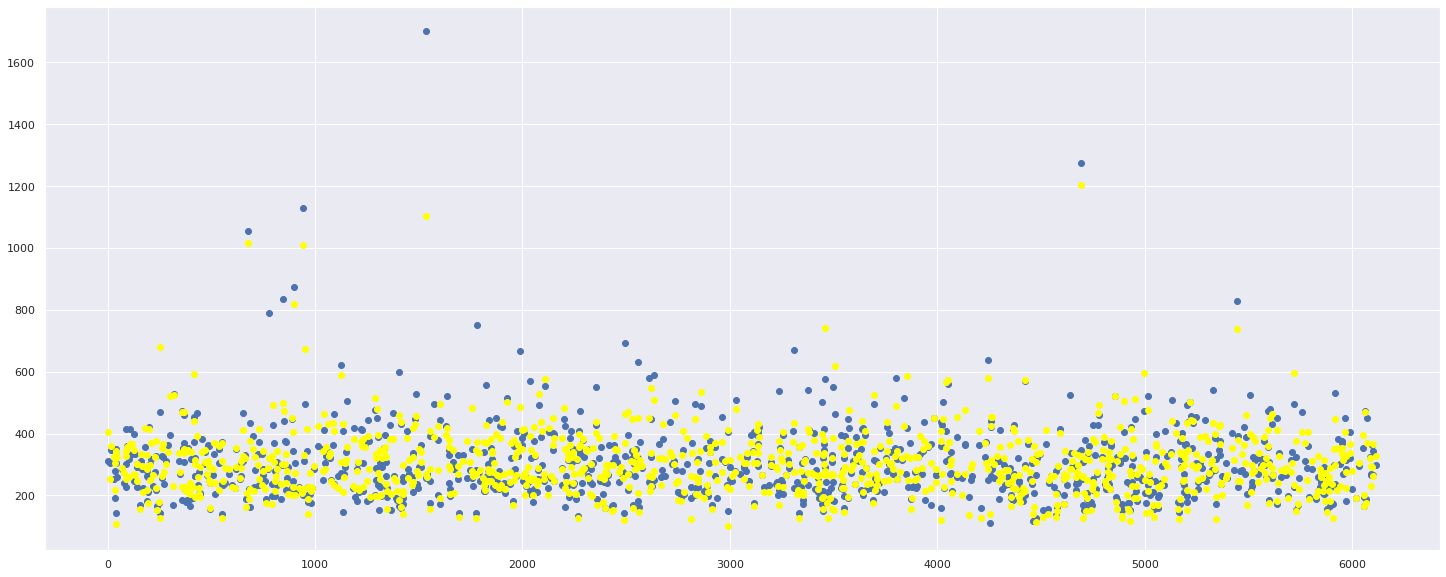

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(y_val.sort_index().head(1000),'o')
plt.plot(plotdf.sort_index().head(1000),'o',color='yellow')
plt.show()

## Test

In [ ]:
#data_test = pd.read_csv(path + 'travel_packages_test.csv') #Drive

In [ ]:
data_test = pd.read_csv('travel_packages_test.csv')

In [ ]:
data_test.head()

Unnamed: 0  ...                                 Cancellation Rules
0        7798  ...  Cancellation any time after making the 1st pay...
1        1788  ...  Cancellation any time after making the 1st pay...
2        2084  ...  Cancellation any time after making the 1st pay...
3       18361  ...  Cancellation any time after making the 1st pay...
4       13939  ...  Cancellation any time after making the 1st pay...

[5 rows x 14 columns]

### Test 1

In [ ]:
submmit = procesado_data(data_test)

In [ ]:
submmit = submmit.rename(columns = {'Unnamed: 0': 'Index'})
submmit = submmit.set_index('Index')

In [ ]:
submmit.head()

Package Type  Itinerary  Flight Stops  ...  zero  zong  zoolog
Index                                         ...                    
7798              3          6             2  ...     0     0       1
1788              4          4             0  ...     0     0       0
2084              4          5             0  ...     0     0       0
18361             3          4             2  ...     0     0       0
13939             3          6             2  ...     0     0       0

[5 rows x 1515 columns]

In [ ]:
prediccion = modelo_2.predict(submmit)

In [ ]:
df1 = submmit.copy()
df1['PPPrice'] = prediccion

pruebas = df1[['PPPrice']]

In [ ]:
pruebas.head(10)

PPPrice
Index            
7798   235.222199
1788   276.822498
2084   295.598256
18361  201.954759
13939  361.775146
2162   203.509594
1447   448.662431
16780  278.337193
5685   291.601798
6910   352.416970

### Test 2

In [ ]:
submmit = segundo_procesado(data_test)

In [ ]:
submmit = submmit.rename(columns = {'Unnamed: 0': 'Index'})
submmit = submmit.set_index('Index')

In [ ]:
j = 1600
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components = j, svd_solver = 'randomized'))
df_PCA = pd.DataFrame(pca_pipe.fit_transform(submmit))

df_PCA.columns = ["PC"+str(i+1) for i in range(j)]

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
prediccion = modelo_3.predict(df_PCA)

In [ ]:
df1 = submmit.copy()
df1['PPPrice'] = prediccion

pruebas = df1[['PPPrice']]

In [ ]:
pruebas.head()

PPPrice
Index            
7798   273.579875
1788   285.721071
2084   339.379740
18361  286.095538
13939  318.670344

## Generar csv

In [ ]:
pruebas.to_csv('predicciones.csv') #Convertimos a csv